In [6]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


In [7]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [8]:
import tensorflow_datasets as tfds

tfds.__version__

'4.4.0'

In [9]:
!mkdir -p ~/aiffel/flowers/FlowerImages
!ln -s ~/data/* ~/aiffel/flowers/

ln: failed to create symbolic link '/aiffel/aiffel/flowers/cat_face.jpg': File exists
ln: failed to create symbolic link '/aiffel/aiffel/flowers/cats_vs_dogs': File exists
ln: failed to create symbolic link '/aiffel/aiffel/flowers/my_cat.jpg': File exists
ln: failed to create symbolic link '/aiffel/aiffel/flowers/my_dog.jpg': File exists


In [11]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='~/aiffel/flowers/',
    download=True,
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /aiffel/aiffel/flowers/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [12]:
print(raw_train)
print(raw_validation)
print(raw_test)

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("슝~")

슝~


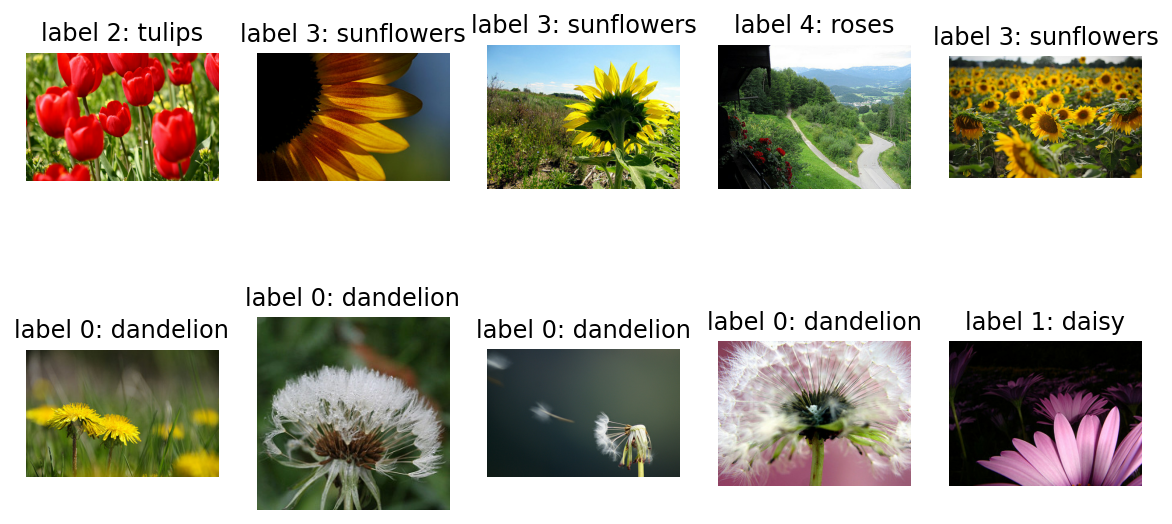

In [14]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [16]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

print("슝~")

슝~


In [17]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>


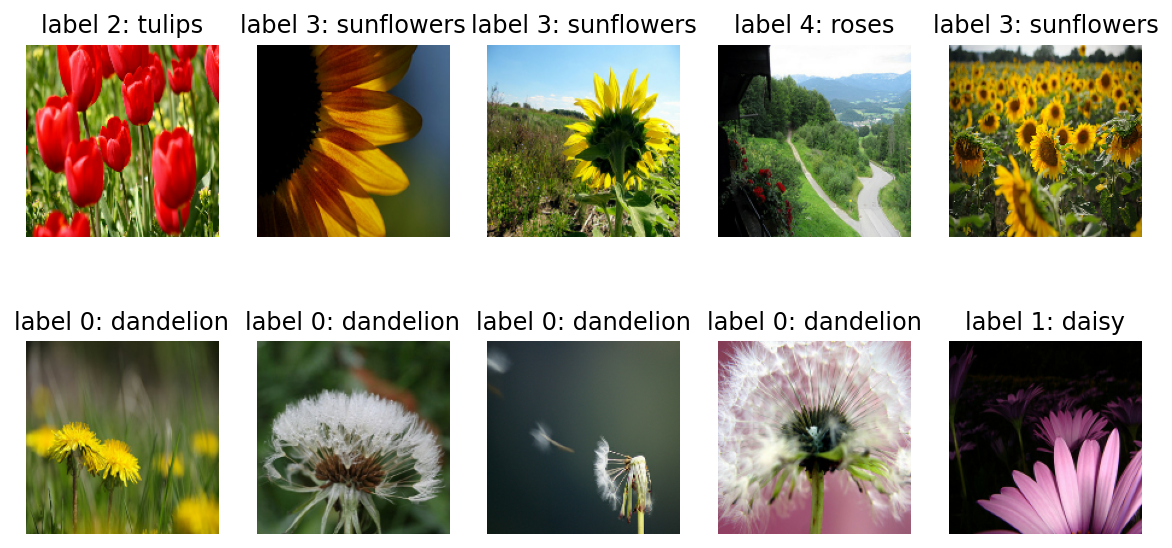

In [18]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("슝~")

슝~


# LMS에서 썼던 기본 모델로 학습해보기

In [41]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax')
])

print("슝~")

슝~


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [49]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

print("슝~")

슝~


In [50]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
print("슝~")

슝~


In [51]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
print("슝~")

슝~


In [52]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

In [53]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.5f}".format(loss0))
print("initial accuracy: {:.5f}".format(accuracy0))

11/20 [===============>..............] - ETA: 0s - loss: 1.6554 - accuracy: 0.1562WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 20 batches). You may need to use the repeat() function when building your dataset.


20/20 [==============================] - 0s 8ms/step - loss: 1.6556 - accuracy: 0.1580
initial loss: 1.65560
initial accuracy: 0.15804


In [54]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 4s 29ms/step - loss: 1.4024 - accuracy: 0.4213 - val_loss: 1.1360 - val_accuracy: 0.5886
Epoch 2/10
92/92 [==============================] - 3s 29ms/step - loss: 1.1120 - accuracy: 0.5388 - val_loss: 1.0262 - val_accuracy: 0.5967
Epoch 3/10
92/92 [==============================] - 3s 28ms/step - loss: 0.9773 - accuracy: 0.6134 - val_loss: 1.0196 - val_accuracy: 0.5967
Epoch 4/10
92/92 [==============================] - 3s 29ms/step - loss: 0.8598 - accuracy: 0.6614 - val_loss: 1.0110 - val_accuracy: 0.5913
Epoch 5/10
92/92 [==============================] - 3s 28ms/step - loss: 0.7637 - accuracy: 0.7258 - val_loss: 0.9973 - val_accuracy: 0.6158
Epoch 6/10
92/92 [==============================] - 3s 29ms/step - loss: 0.6653 - accuracy: 0.7575 - val_loss: 0.9520 - val_accuracy: 0.6376
Epoch 7/10
92/92 [==============================] - 3s 28ms/step - loss: 0.5898 - accuracy: 0.7987 - val_loss: 0.9891 - val_accuracy: 0.6240
Epoch 8/10
92

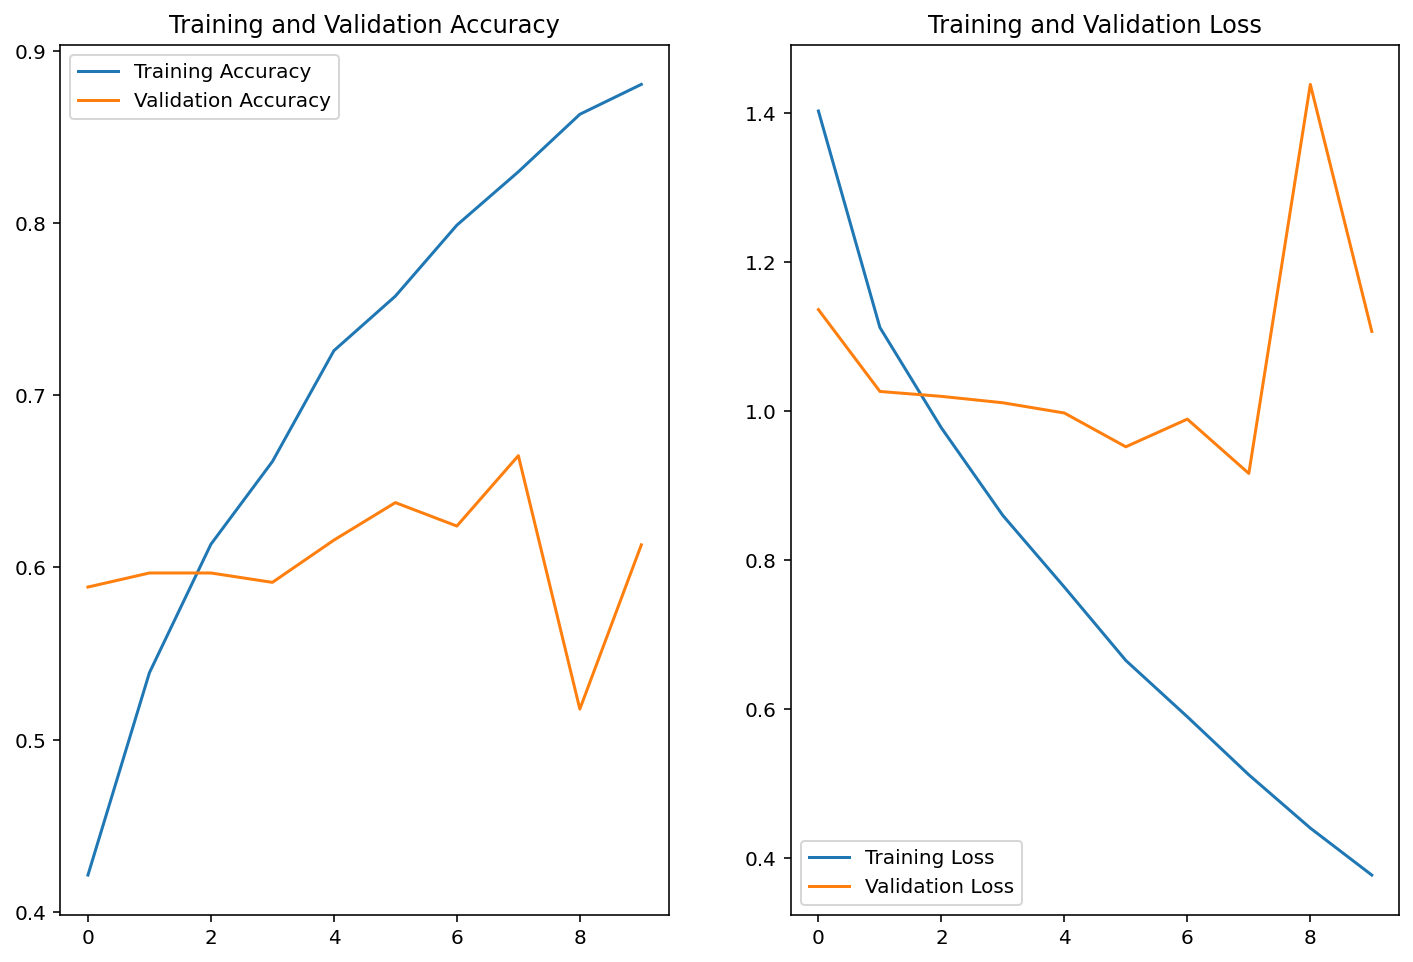

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 9번쨰 에폭이후 과적합이 있는것으로 보인다
# 일단 이것 저것 추가 해보자
# 드롭아웃과 데이터 증강 추가

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모델 정의
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),  # 드롭아웃 추가
    Dense(units=5, activation='softmax')  # 클래스의 수를 5로 수정
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [57]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 6s 51ms/step - loss: 1.3133 - accuracy: 0.4530 - val_loss: 1.1128 - val_accuracy: 0.5450
Epoch 2/10
92/92 [==============================] - 4s 44ms/step - loss: 1.0464 - accuracy: 0.5821 - val_loss: 1.0343 - val_accuracy: 0.5886
Epoch 3/10
92/92 [==============================] - 5s 44ms/step - loss: 0.9189 - accuracy: 0.6413 - val_loss: 1.0274 - val_accuracy: 0.6240
Epoch 4/10
92/92 [==============================] - 5s 44ms/step - loss: 0.8289 - accuracy: 0.6870 - val_loss: 0.8959 - val_accuracy: 0.6540
Epoch 5/10
92/92 [==============================] - 4s 44ms/step - loss: 0.7305 - accuracy: 0.7258 - val_loss: 0.9579 - val_accuracy: 0.6158
Epoch 6/10
92/92 [==============================] - 5s 44ms/step - loss: 0.6431 - accuracy: 0.7633 - val_loss: 0.8521 - val_accuracy: 0.6757
Epoch 7/10
92/92 [==============================] - 4s 44ms/step - loss: 0.5638 - accuracy: 0.7990 - val_loss: 0.9987 - val_accuracy: 0.6403
Epoch 8/10
92

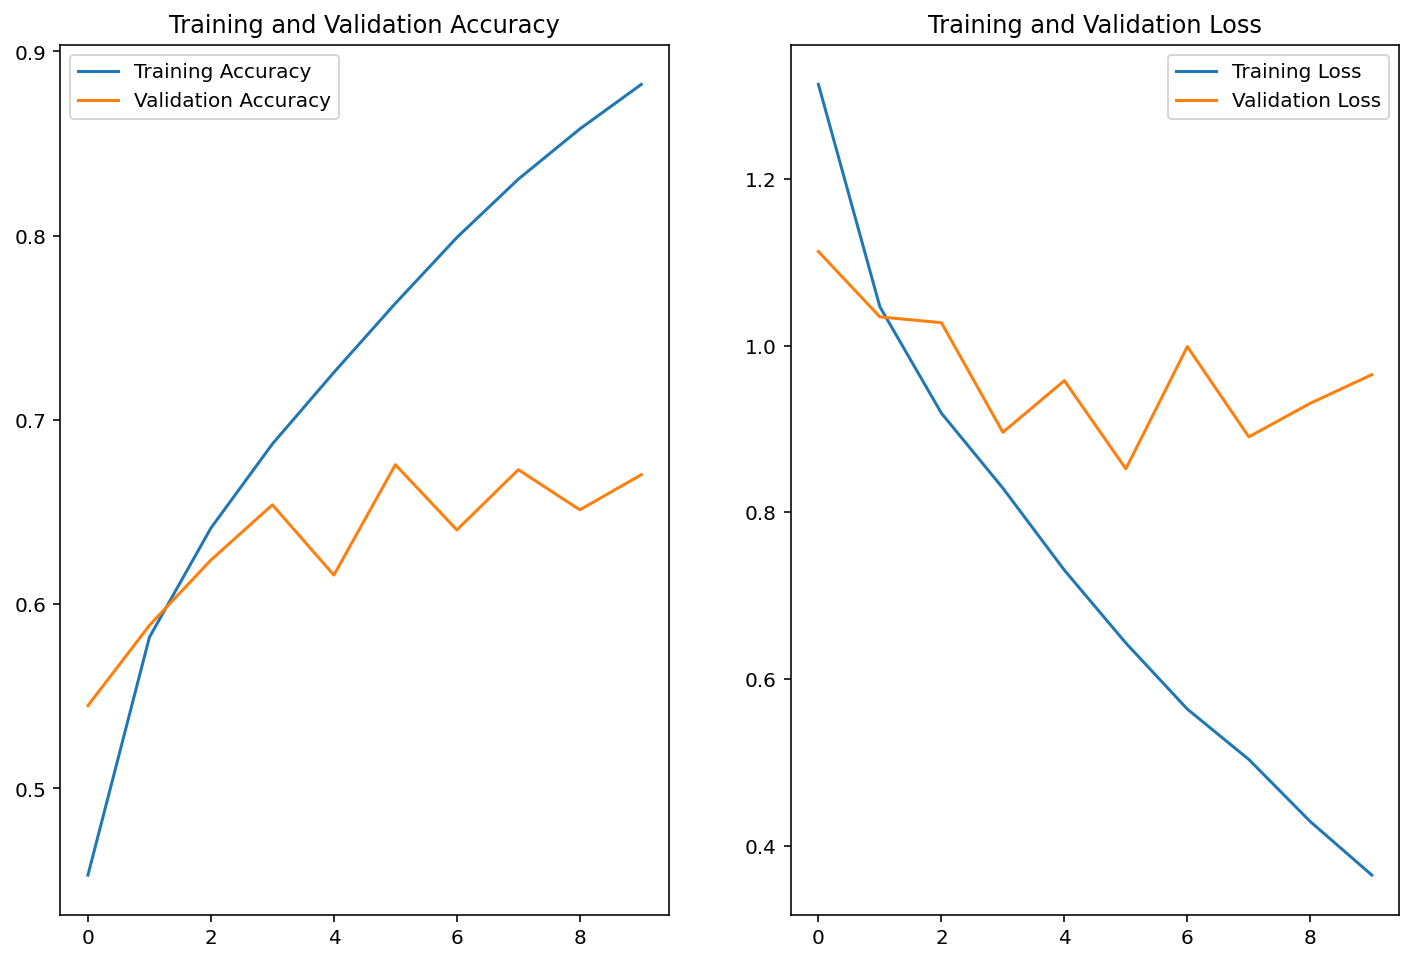

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 이전보다는 안정적인 그래프가 보인다.
# 배치 정규화를 추가해보자

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모델 정의
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')  # 클래스의 수를 5로 수정
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 7s 53ms/step - loss: 1.7486 - accuracy: 0.4973 - val_loss: 2.5265 - val_accuracy: 0.2589
Epoch 2/10
92/92 [==============================] - 5s 52ms/step - loss: 0.9394 - accuracy: 0.7020 - val_loss: 3.2842 - val_accuracy: 0.2589
Epoch 3/10
92/92 [==============================] - 5s 52ms/step - loss: 0.5590 - accuracy: 0.8174 - val_loss: 2.3685 - val_accuracy: 0.4142
Epoch 4/10
92/92 [==============================] - 5s 52ms/step - loss: 0.3251 - accuracy: 0.8862 - val_loss: 1.7291 - val_accuracy: 0.4986
Epoch 5/10
92/92 [==============================] - 5s 52ms/step - loss: 0.2090 - accuracy: 0.9251 - val_loss: 1.2835 - val_accuracy: 0.5695
Epoch 6/10
92/92 [==============================] - 5s 52ms/step - loss: 0.1418 - accuracy: 0.9557 - val_loss: 1.2414 - val_accuracy: 0.5995
Epoch 7/10
92/92 [==============================] - 5s 51ms/step - loss: 0.1045 - accuracy: 0.9659 - val_loss: 1.1898 - val_accuracy: 0.6649
Epoch 8/10
92

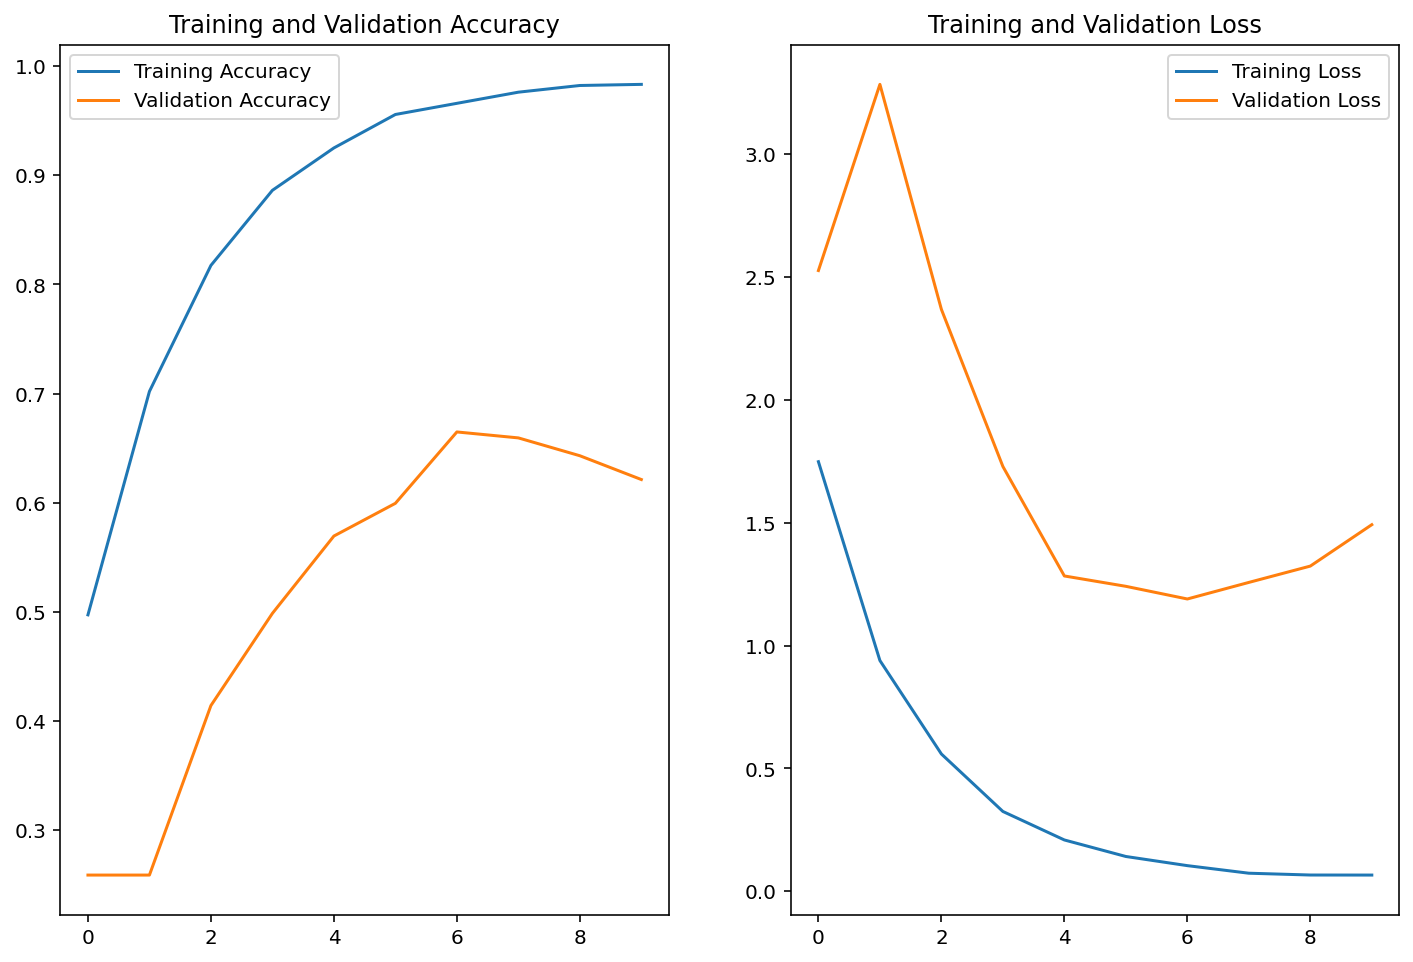

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 결과가 더 안좋다 배치 정규화는 별 효과가 없는것 같다 
# 모델의 깊이를 더 깊게 해보자. 배치 정규화는 모델의 깊이가 깊을 수록 효과적이라고 한다
# 학습률을 높여보았다
# 최적화 모델을 ADAM으로 바꾸었다.


In [70]:
from tensorflow.keras.optimizers import Adam

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout 비율 조정
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001  # 더 큰 학습률 시도
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 12s 103ms/step - loss: 1.5527 - accuracy: 0.5334 - val_loss: 4.3148 - val_accuracy: 0.2425
Epoch 2/10
92/92 [==============================] - 8s 84ms/step - loss: 0.9613 - accuracy: 0.6451 - val_loss: 3.9125 - val_accuracy: 0.2480
Epoch 3/10
92/92 [==============================] - 8s 84ms/step - loss: 0.7239 - accuracy: 0.7364 - val_loss: 2.4908 - val_accuracy: 0.2779
Epoch 4/10
92/92 [==============================] - 8s 84ms/step - loss: 0.5377 - accuracy: 0.7997 - val_loss: 1.9387 - val_accuracy: 0.4087
Epoch 5/10
92/92 [==============================] - 8s 83ms/step - loss: 0.4138 - accuracy: 0.8569 - val_loss: 1.2876 - val_accuracy: 0.5422
Epoch 6/10
92/92 [==============================] - 8s 84ms/step - loss: 0.3117 - accuracy: 0.8920 - val_loss: 1.1047 - val_accuracy: 0.6431
Epoch 7/10
92/92 [==============================] - 8s 83ms/step - loss: 0.1836 - accuracy: 0.9394 - val_loss: 1.0692 - val_accuracy: 0.6431
Epoch 8/10


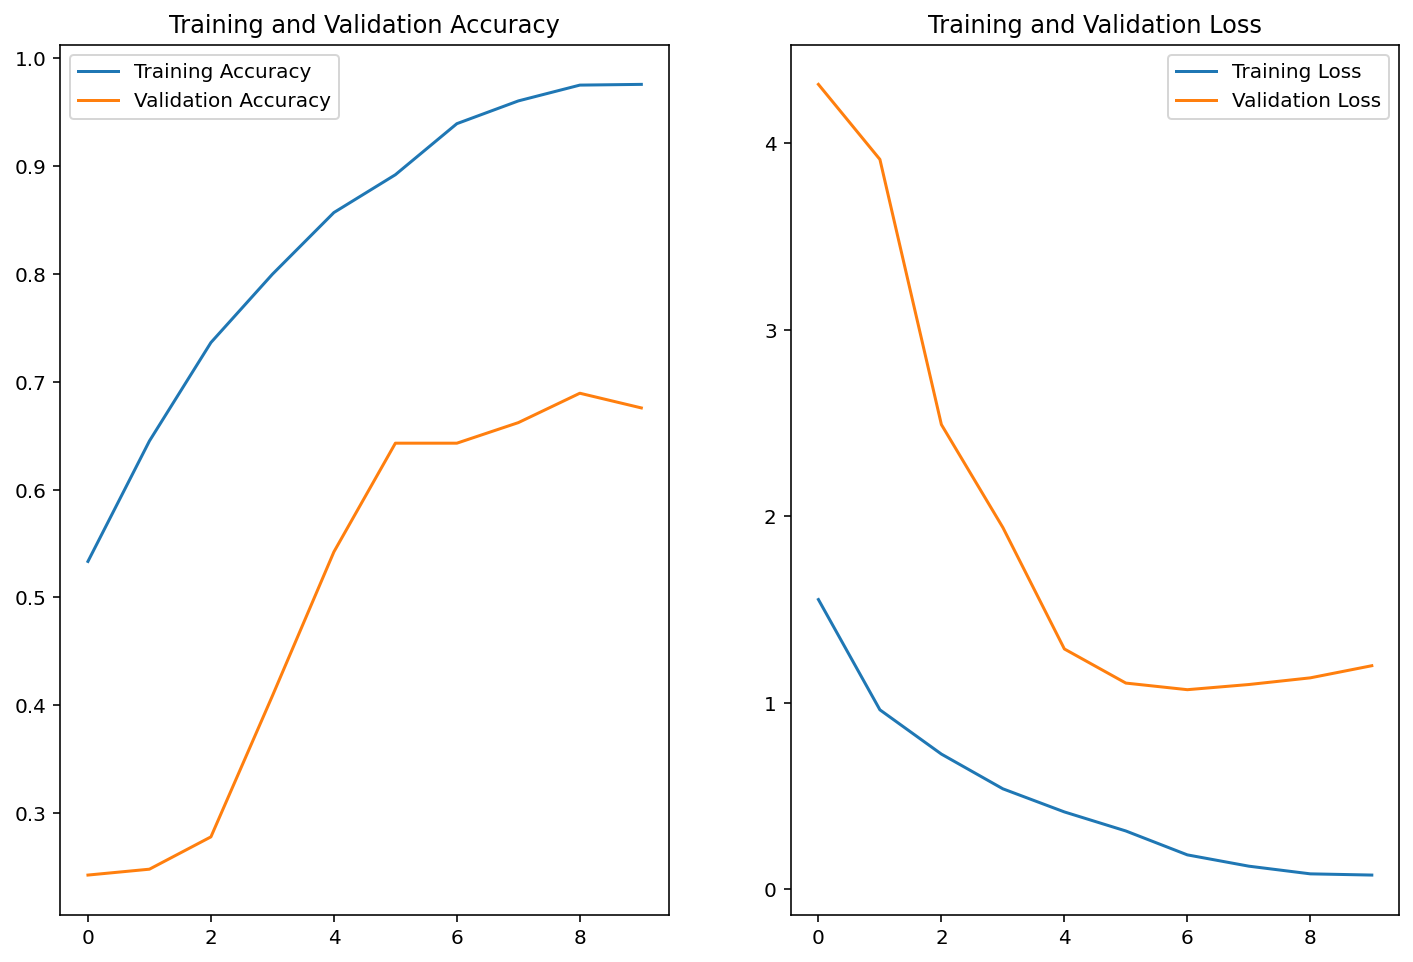

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 전보다 안정적인 그래프가 보인다. 모델이 깊어지는것이 효과 있는것 같다. 더 깊게 해보자 
# 층을 두개 더 추가하고
# 에폭도 더 높여봐도 될것 같다


In [72]:
from tensorflow.keras.optimizers import Adam

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 20
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/20
92/92 [==============================] - 13s 118ms/step - loss: 1.5995 - accuracy: 0.4905 - val_loss: 4.3796 - val_accuracy: 0.2425
Epoch 2/20
92/92 [==============================] - 10s 102ms/step - loss: 1.0500 - accuracy: 0.6087 - val_loss: 3.0007 - val_accuracy: 0.2425
Epoch 3/20
92/92 [==============================] - 10s 103ms/step - loss: 0.9618 - accuracy: 0.6434 - val_loss: 3.2783 - val_accuracy: 0.2480
Epoch 4/20
92/92 [==============================] - 10s 102ms/step - loss: 0.8722 - accuracy: 0.6805 - val_loss: 1.6748 - val_accuracy: 0.3978
Epoch 5/20
92/92 [==============================] - 10s 101ms/step - loss: 0.7591 - accuracy: 0.7149 - val_loss: 1.0704 - val_accuracy: 0.6240
Epoch 6/20
92/92 [==============================] - 10s 101ms/step - loss: 0.6745 - accuracy: 0.7551 - val_loss: 1.1193 - val_accuracy: 0.6349
Epoch 7/20
92/92 [==============================] - 10s 101ms/step - loss: 0.6161 - accuracy: 0.7701 - val_loss: 0.8438 - val_accuracy: 0.6812

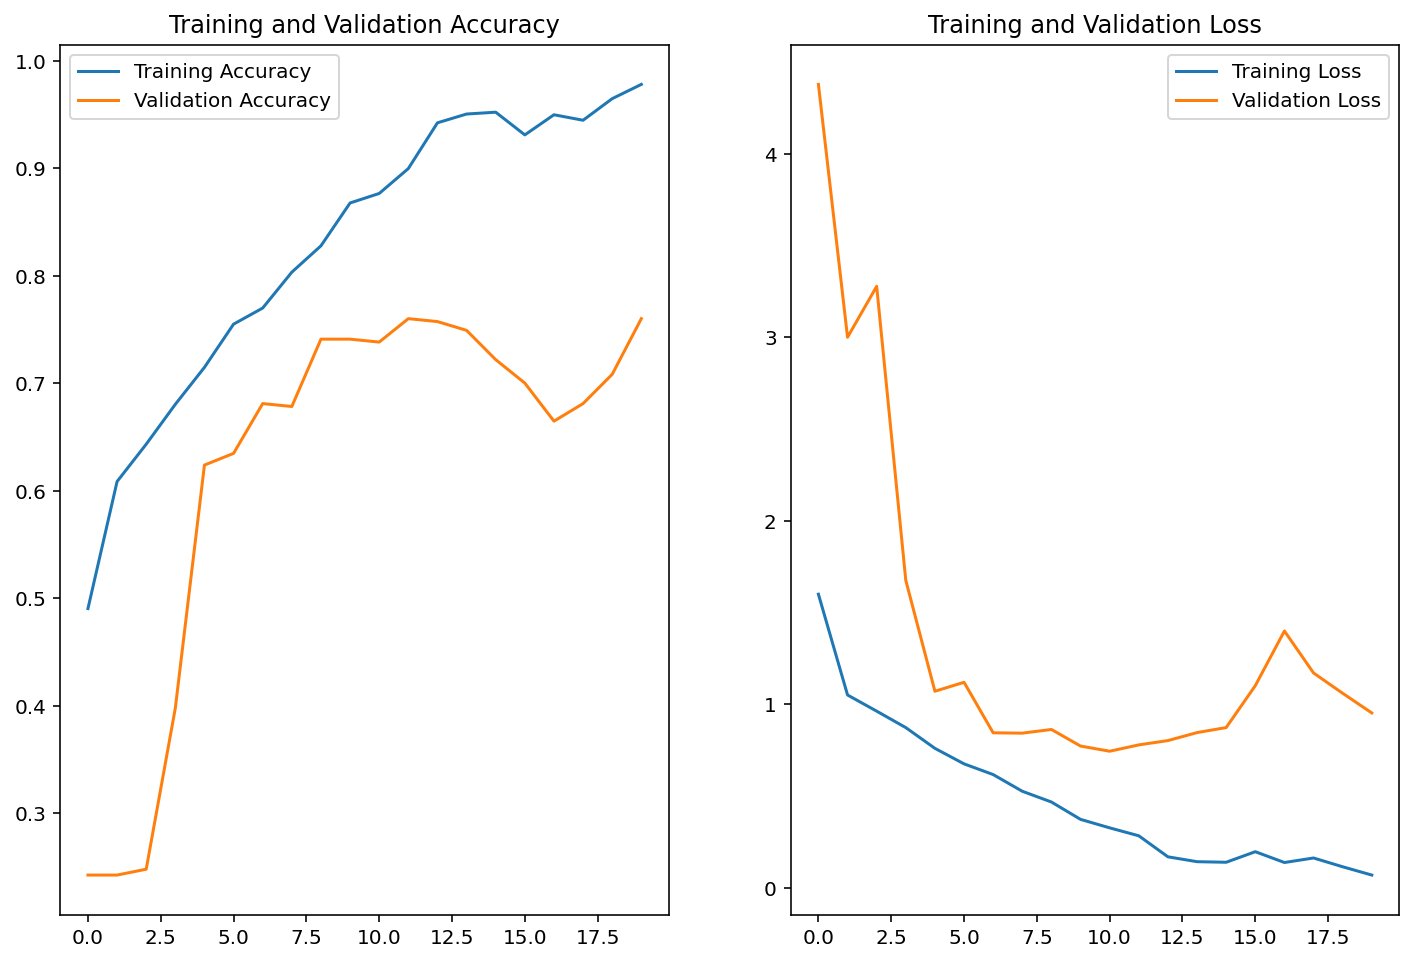

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 효과가 좋다. 정밀도가 높아 졌다. 모델 깊이가 깡패인가보다..
# 13번 에폭 이후 과적합이 보인다. 드롭아웃을 높여보면 어떨까?

In [74]:
from tensorflow.keras.optimizers import Adam

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5), #드롭 아웃 조정
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 20
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/20
92/92 [==============================] - 11s 103ms/step - loss: 1.6928 - accuracy: 0.4980 - val_loss: 3.8178 - val_accuracy: 0.2343
Epoch 2/20
92/92 [==============================] - 10s 102ms/step - loss: 1.1628 - accuracy: 0.6005 - val_loss: 3.5984 - val_accuracy: 0.2616
Epoch 3/20
92/92 [==============================] - 10s 103ms/step - loss: 0.9826 - accuracy: 0.6550 - val_loss: 4.1199 - val_accuracy: 0.2589
Epoch 4/20
92/92 [==============================] - 10s 103ms/step - loss: 0.8608 - accuracy: 0.6962 - val_loss: 2.0094 - val_accuracy: 0.4251
Epoch 5/20
92/92 [==============================] - 10s 102ms/step - loss: 0.7382 - accuracy: 0.7354 - val_loss: 1.3111 - val_accuracy: 0.5967
Epoch 6/20
92/92 [==============================] - 10s 102ms/step - loss: 0.6498 - accuracy: 0.7575 - val_loss: 0.9139 - val_accuracy: 0.6921
Epoch 7/20
92/92 [==============================] - 10s 101ms/step - loss: 0.5916 - accuracy: 0.7813 - val_loss: 0.8031 - val_accuracy: 0.7003

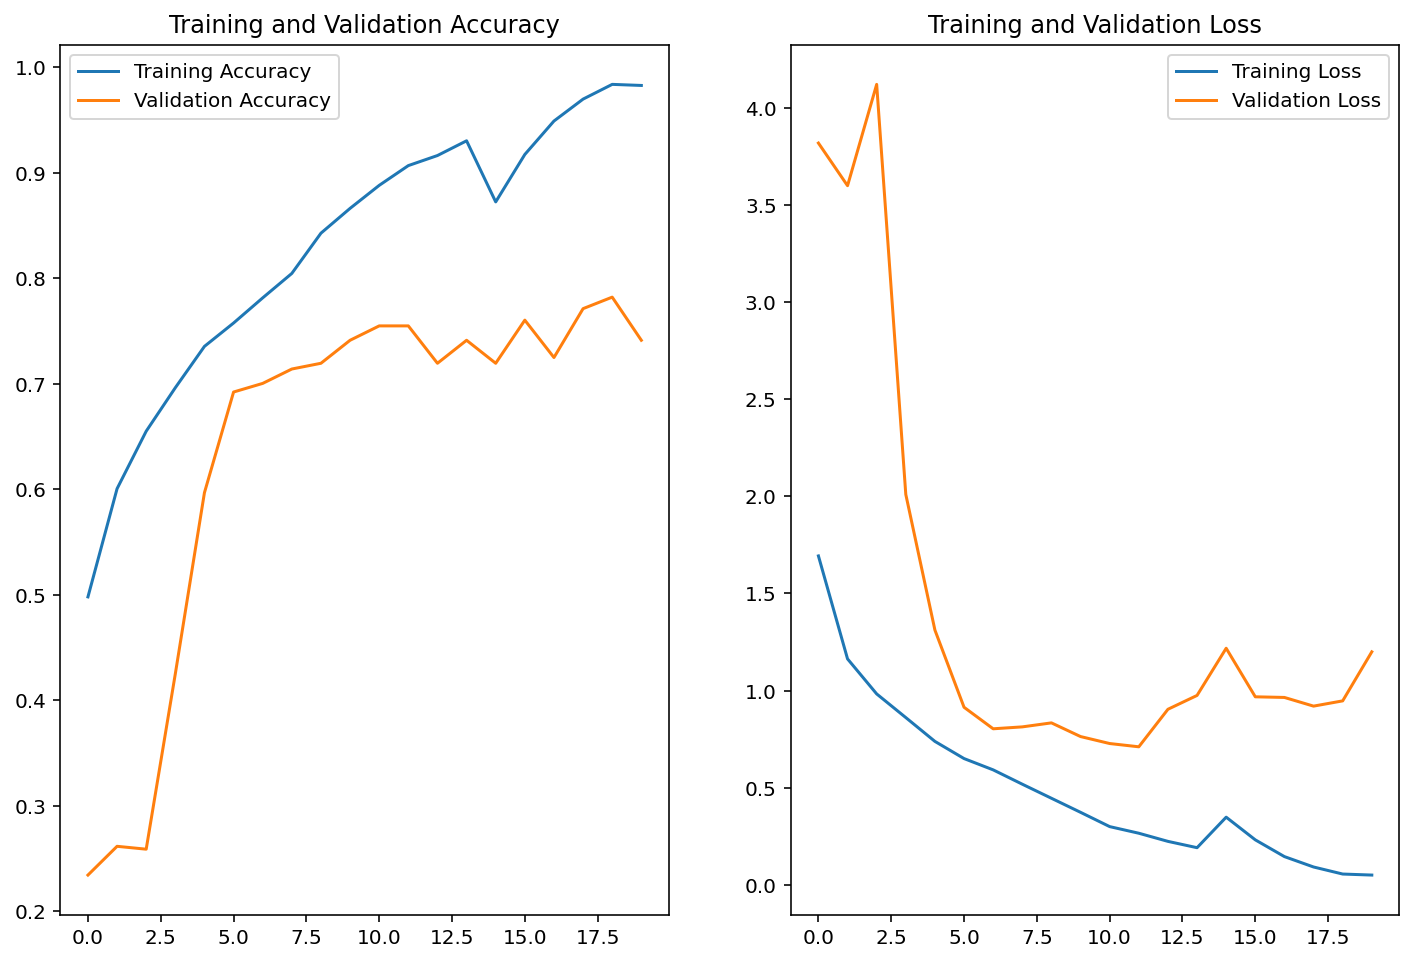

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 드롭아웃만 높였는데, 성능이 더 좋아졌다!! 
# 이제  L2 규제를 추가해보자


In [77]:
from tensorflow.keras.regularizers import l2

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01), input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 20
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/20
92/92 [==============================] - 11s 106ms/step - loss: 21.7511 - accuracy: 0.4847 - val_loss: 17.3051 - val_accuracy: 0.2425
Epoch 2/20
92/92 [==============================] - 10s 104ms/step - loss: 9.3811 - accuracy: 0.5538 - val_loss: 8.2218 - val_accuracy: 0.2425
Epoch 3/20
92/92 [==============================] - 10s 106ms/step - loss: 5.0120 - accuracy: 0.5685 - val_loss: 4.5134 - val_accuracy: 0.2643
Epoch 4/20
92/92 [==============================] - 10s 105ms/step - loss: 3.3686 - accuracy: 0.6001 - val_loss: 3.5101 - val_accuracy: 0.3215
Epoch 5/20
92/92 [==============================] - 10s 104ms/step - loss: 2.6364 - accuracy: 0.6185 - val_loss: 3.0545 - val_accuracy: 0.3951
Epoch 6/20
92/92 [==============================] - 10s 104ms/step - loss: 2.3170 - accuracy: 0.6029 - val_loss: 3.0608 - val_accuracy: 0.3351
Epoch 7/20
92/92 [==============================] - 10s 103ms/step - loss: 2.0860 - accuracy: 0.6328 - val_loss: 2.3853 - val_accuracy: 0.48

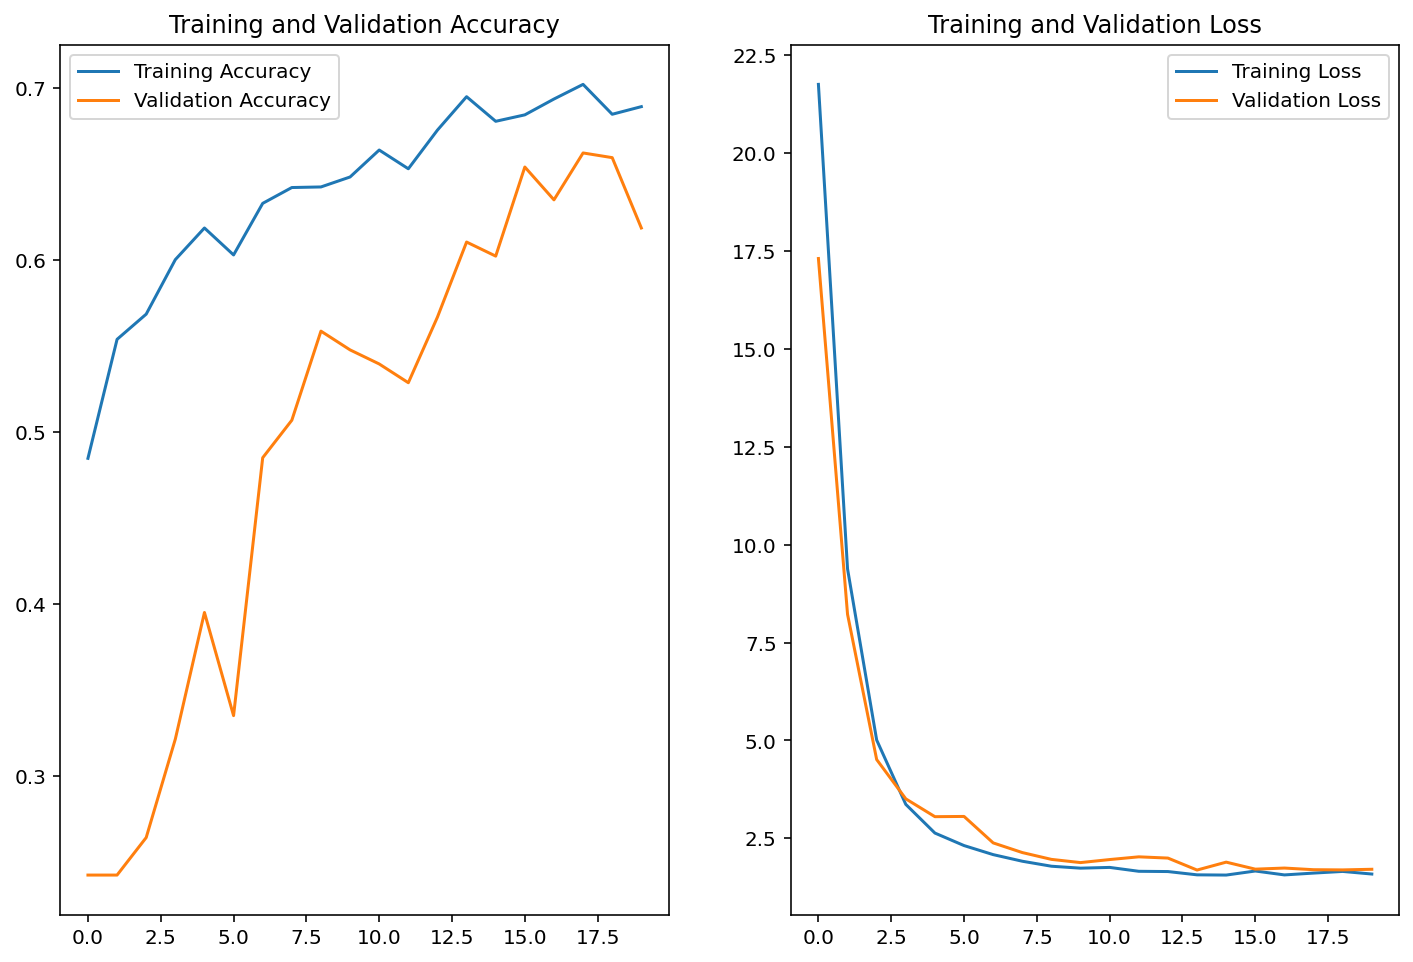

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 성능이 더 떨어졌다! 그런데 손실율이 굉장히 안정적으로 줄어드는 모습이다.
# 규제 정도를 조금 줄이고, 에폭도 더 높여보자.

In [79]:

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 30
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/30
92/92 [==============================] - 11s 106ms/step - loss: 11.5081 - accuracy: 0.4874 - val_loss: 9.1744 - val_accuracy: 0.2425
Epoch 2/30
92/92 [==============================] - 10s 104ms/step - loss: 4.9959 - accuracy: 0.5572 - val_loss: 6.9571 - val_accuracy: 0.2425
Epoch 3/30
92/92 [==============================] - 10s 105ms/step - loss: 3.3071 - accuracy: 0.6189 - val_loss: 5.1187 - val_accuracy: 0.2752
Epoch 4/30
92/92 [==============================] - 10s 105ms/step - loss: 2.8300 - accuracy: 0.6461 - val_loss: 4.9882 - val_accuracy: 0.3134
Epoch 5/30
92/92 [==============================] - 10s 105ms/step - loss: 2.5176 - accuracy: 0.6502 - val_loss: 2.8323 - val_accuracy: 0.4850
Epoch 6/30
92/92 [==============================] - 10s 104ms/step - loss: 2.2122 - accuracy: 0.7006 - val_loss: 2.4177 - val_accuracy: 0.5613
Epoch 7/30
92/92 [==============================] - 10s 103ms/step - loss: 2.1833 - accuracy: 0.6819 - val_loss: 2.2314 - val_accuracy: 0.645

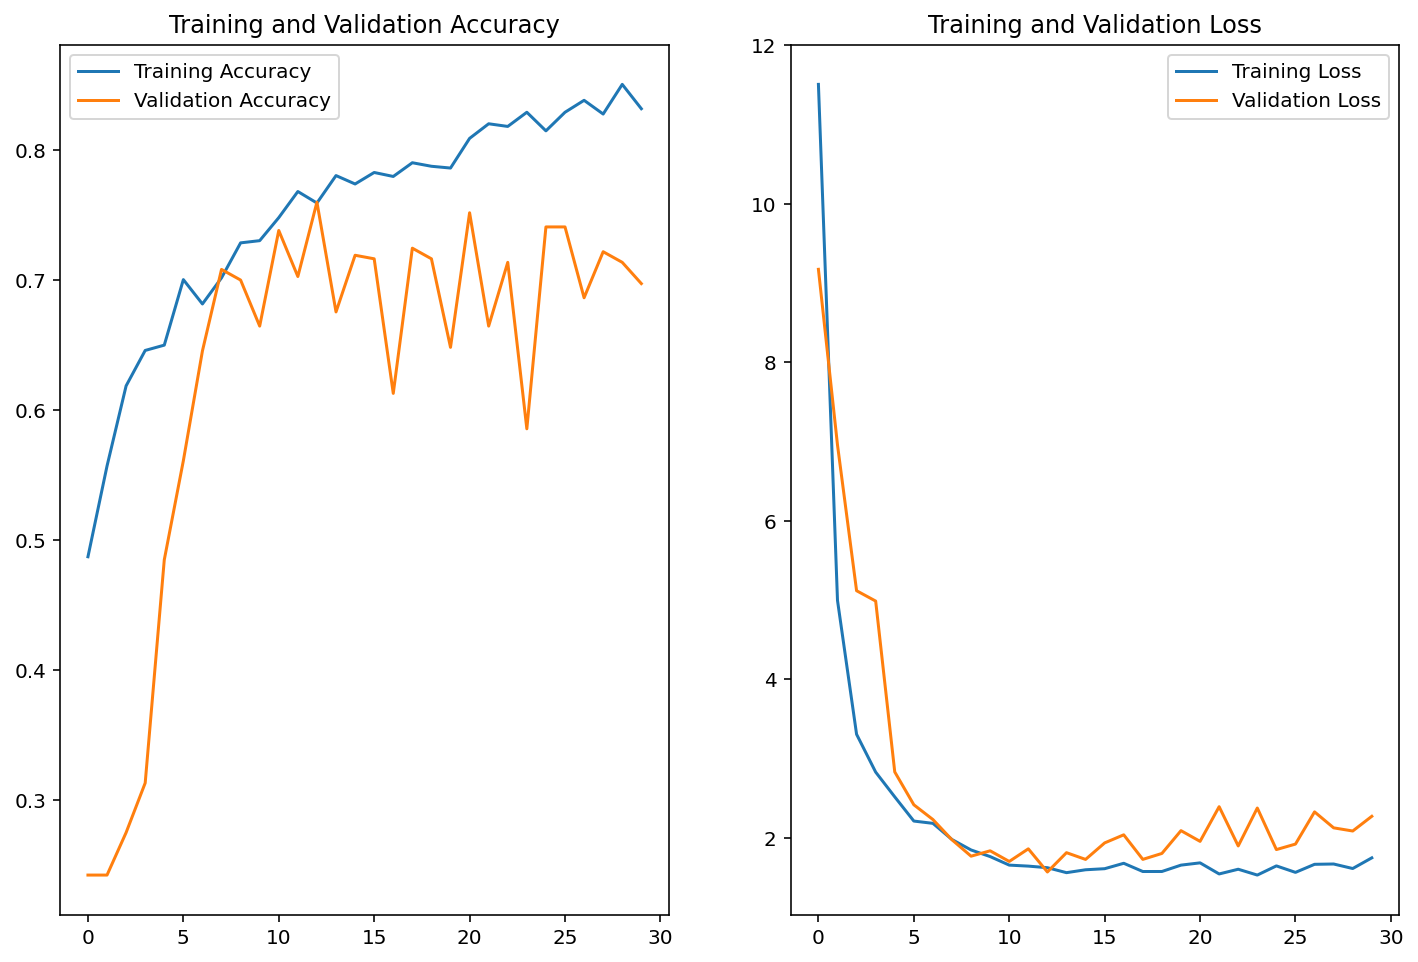

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 규제를 낮추니 성능은 높아졌는데, 그래프가 불안정하다.. 규제를 처음보다 더 높여보자
# 그리고 에폭은 높이나 낮추나 비슷하다.. 10으로 다시 바꿔준다

In [81]:

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1), input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 11s 105ms/step - loss: 50.7227 - accuracy: 0.4830 - val_loss: 10.8044 - val_accuracy: 0.2425
Epoch 2/10
92/92 [==============================] - 10s 103ms/step - loss: 6.1494 - accuracy: 0.5089 - val_loss: 4.5604 - val_accuracy: 0.2425
Epoch 3/10
92/92 [==============================] - 10s 104ms/step - loss: 3.5195 - accuracy: 0.5177 - val_loss: 3.9286 - val_accuracy: 0.2425
Epoch 4/10
92/92 [==============================] - 10s 105ms/step - loss: 3.0091 - accuracy: 0.5320 - val_loss: 3.5500 - val_accuracy: 0.3052
Epoch 5/10
92/92 [==============================] - 10s 103ms/step - loss: 2.7383 - accuracy: 0.5545 - val_loss: 3.6278 - val_accuracy: 0.2425
Epoch 6/10
92/92 [==============================] - 10s 103ms/step - loss: 2.6372 - accuracy: 0.5433 - val_loss: 3.1574 - val_accuracy: 0.3215
Epoch 7/10
92/92 [==============================] - 10s 102ms/step - loss: 2.6670 - accuracy: 0.5490 - val_loss: 2.8758 - val_accuracy: 0.38

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 에폭 다시 30 해볼까? 약간 희망고문 당하는 기분이다.

In [83]:

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1), input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 30
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/30
92/92 [==============================] - 12s 106ms/step - loss: 54.3227 - accuracy: 0.4663 - val_loss: 12.5547 - val_accuracy: 0.2425
Epoch 2/30
92/92 [==============================] - 10s 103ms/step - loss: 6.8677 - accuracy: 0.4809 - val_loss: 5.8404 - val_accuracy: 0.2425
Epoch 3/30
92/92 [==============================] - 10s 105ms/step - loss: 3.6679 - accuracy: 0.5119 - val_loss: 3.6696 - val_accuracy: 0.2425
Epoch 4/30
92/92 [==============================] - 10s 104ms/step - loss: 2.9886 - accuracy: 0.5167 - val_loss: 3.3418 - val_accuracy: 0.3433
Epoch 5/30
92/92 [==============================] - 10s 103ms/step - loss: 2.8406 - accuracy: 0.5204 - val_loss: 3.2658 - val_accuracy: 0.2834
Epoch 6/30
92/92 [==============================] - 10s 102ms/step - loss: 2.7552 - accuracy: 0.5446 - val_loss: 2.8062 - val_accuracy: 0.3079
Epoch 7/30
92/92 [==============================] - 10s 102ms/step - loss: 2.4452 - accuracy: 0.5657 - val_loss: 2.7188 - val_accuracy: 0.44

KeyboardInterrupt: 

# 결과가 개판이라 중단했다. 역시 에폭은 10만줘도 충분한가보다
# 결과적으로 L2 규제는 손실율이 안정적으로 낮아지기는 하지만 성능향상으로 이어지지는 못했다. 
# 일단은 L2 규제는 0.01이 가장 적절한듯 하다. 검증 데이터 Loss가 낮아지는것으로 봤을때는 과적합을 줄이는데는 확실히 효과적이다. 모델의 깊이를 더 깊게 하고 Dense 레이어를 하나더 추가해보자

In [84]:

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01), input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=2048, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=1024, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 17s 155ms/step - loss: 48.4166 - accuracy: 0.4339 - val_loss: 37.0968 - val_accuracy: 0.2425
Epoch 2/15
92/92 [==============================] - 14s 148ms/step - loss: 22.3629 - accuracy: 0.5211 - val_loss: 15.5121 - val_accuracy: 0.2834
Epoch 3/15
92/92 [==============================] - 14s 147ms/step - loss: 10.8984 - accuracy: 0.5388 - val_loss: 9.1530 - val_accuracy: 0.2425
Epoch 4/15
92/92 [==============================] - 14s 145ms/step - loss: 6.4712 - accuracy: 0.5892 - val_loss: 6.0293 - val_accuracy: 0.3079
Epoch 5/15
92/92 [==============================] - 14s 145ms/step - loss: 4.4213 - accuracy: 0.5889 - val_loss: 4.4658 - val_accuracy: 0.4033
Epoch 6/15
92/92 [==============================] - 14s 144ms/step - loss: 3.3900 - accuracy: 0.6148 - val_loss: 3.5243 - val_accuracy: 0.3215
Epoch 7/15
92/92 [==============================] - 14s 145ms/step - loss: 2.6764 - accuracy: 0.6362 - val_loss: 2.8828 - val_accuracy: 0

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 모델이 깊어졌는데도 성능 개선이 없다.
# 손실율은 역시 안정적으로 떨어지기는 한다.
# L2 규제는 삭제해야할것 같다.
# 전부 그대로 두고 L2 규제를 삭제한다.

In [86]:

# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=2048, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=1024, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 15s 144ms/step - loss: 21.7851 - accuracy: 0.4251 - val_loss: 23.3792 - val_accuracy: 0.2425
Epoch 2/15
92/92 [==============================] - 14s 145ms/step - loss: 10.0549 - accuracy: 0.5208 - val_loss: 10.2232 - val_accuracy: 0.2425
Epoch 3/15
92/92 [==============================] - 14s 145ms/step - loss: 5.5641 - accuracy: 0.5695 - val_loss: 4.8327 - val_accuracy: 0.3215
Epoch 4/15
92/92 [==============================] - 14s 143ms/step - loss: 3.7228 - accuracy: 0.6175 - val_loss: 4.0464 - val_accuracy: 0.3406
Epoch 5/15
92/92 [==============================] - 13s 142ms/step - loss: 2.8364 - accuracy: 0.6424 - val_loss: 2.7731 - val_accuracy: 0.5286
Epoch 6/15
92/92 [==============================] - 13s 141ms/step - loss: 2.2236 - accuracy: 0.6696 - val_loss: 2.0056 - val_accuracy: 0.6676
Epoch 7/15
92/92 [==============================] - 14s 143ms/step - loss: 1.8838 - accuracy: 0.6972 - val_loss: 1.7892 - val_accuracy: 0.

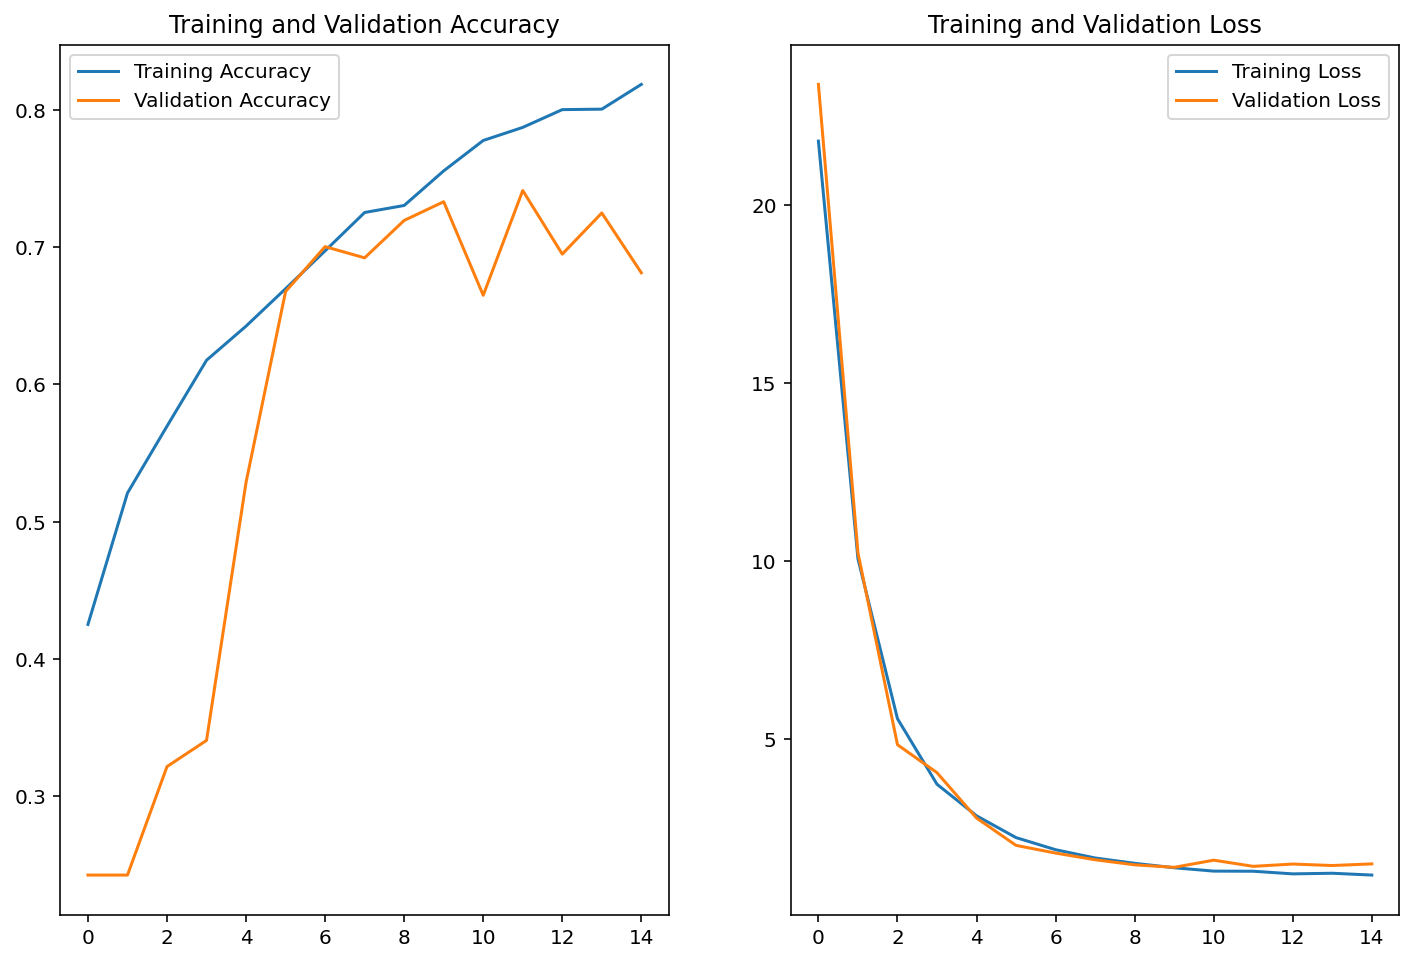

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 모델이 깊어졌고, L2 규제도 없는데, 성능향상이 보이지 않는다. 이제 한계에 부딪힌것 같다.
# 학습률을 다시 낮춰보고, 일단 마무리하자

In [88]:
# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=2048, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=1024, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 15s 144ms/step - loss: 26.3351 - accuracy: 0.4751 - val_loss: 27.0788 - val_accuracy: 0.2425
Epoch 2/15
92/92 [==============================] - 14s 145ms/step - loss: 25.0003 - accuracy: 0.5456 - val_loss: 27.7648 - val_accuracy: 0.2425
Epoch 3/15
92/92 [==============================] - 14s 145ms/step - loss: 23.6611 - accuracy: 0.6001 - val_loss: 26.8253 - val_accuracy: 0.2425
Epoch 4/15
92/92 [==============================] - 14s 143ms/step - loss: 22.3515 - accuracy: 0.6223 - val_loss: 24.1105 - val_accuracy: 0.2507
Epoch 5/15
92/92 [==============================] - 13s 142ms/step - loss: 21.0779 - accuracy: 0.6618 - val_loss: 21.1069 - val_accuracy: 0.5095
Epoch 6/15
92/92 [==============================] - 13s 142ms/step - loss: 19.8409 - accuracy: 0.6737 - val_loss: 19.6959 - val_accuracy: 0.5858
Epoch 7/15
92/92 [==============================] - 14s 143ms/step - loss: 18.6297 - accuracy: 0.7129 - val_loss: 18.1803 - val_ac

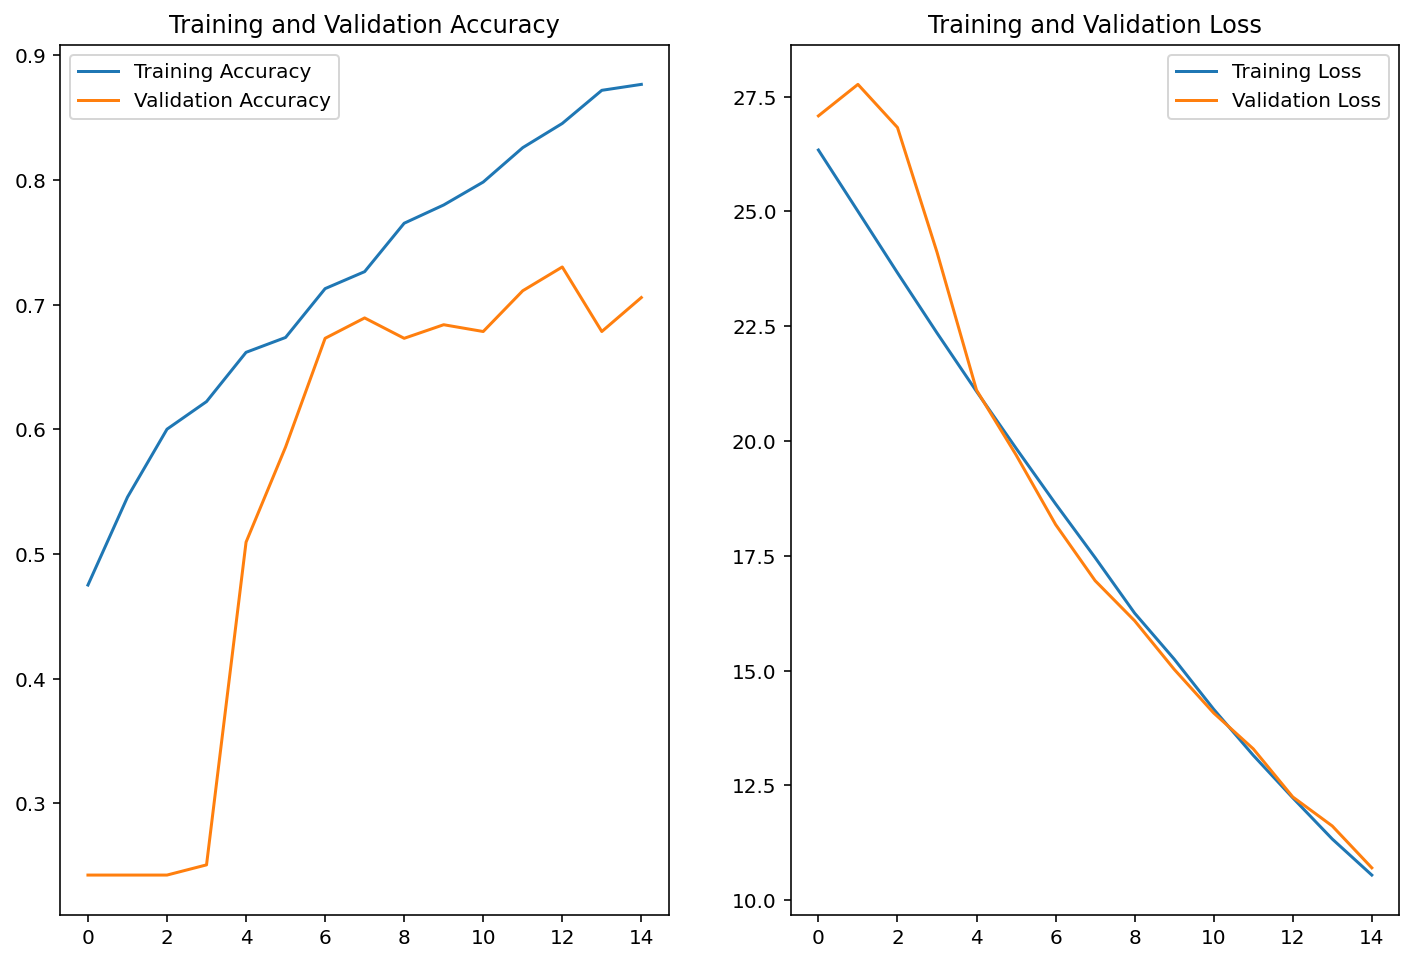

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 정확도도 소폭 낮아졌고, 손실율은 많이 높아졌다.
# 지금보니 Dense 레이어의 규제를 삭제 안했다. 이것만 삭제해보자


In [90]:
# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=2048, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 15s 144ms/step - loss: 1.7285 - accuracy: 0.4864 - val_loss: 6.0461 - val_accuracy: 0.2425
Epoch 2/15
92/92 [==============================] - 14s 145ms/step - loss: 1.3622 - accuracy: 0.5640 - val_loss: 8.0275 - val_accuracy: 0.2425
Epoch 3/15
92/92 [==============================] - 14s 144ms/step - loss: 1.2368 - accuracy: 0.6029 - val_loss: 4.5949 - val_accuracy: 0.2425
Epoch 4/15
92/92 [==============================] - 13s 141ms/step - loss: 1.0276 - accuracy: 0.6618 - val_loss: 2.4626 - val_accuracy: 0.3815
Epoch 5/15
92/92 [==============================] - 13s 142ms/step - loss: 0.9644 - accuracy: 0.6839 - val_loss: 1.7403 - val_accuracy: 0.5504
Epoch 6/15
92/92 [==============================] - 14s 142ms/step - loss: 0.8564 - accuracy: 0.7166 - val_loss: 0.9706 - val_accuracy: 0.7057
Epoch 7/15
92/92 [==============================] - 14s 143ms/step - loss: 0.7800 - accuracy: 0.7415 - val_loss: 1.0823 - val_accuracy: 0.6730

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 성능이 소폭 상승했고, 손실율도 안정적이다.
# 학습율을 높여본다

In [92]:
# 모델 정의
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=2048, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(units=1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=5, activation='softmax')
])

# 데이터 증강을 위한 ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 15s 144ms/step - loss: 1.8473 - accuracy: 0.4302 - val_loss: 8.9191 - val_accuracy: 0.2425
Epoch 2/15
92/92 [==============================] - 14s 144ms/step - loss: 1.3155 - accuracy: 0.5552 - val_loss: 3.3211 - val_accuracy: 0.2480
Epoch 3/15
92/92 [==============================] - 14s 144ms/step - loss: 1.1102 - accuracy: 0.6029 - val_loss: 3.4441 - val_accuracy: 0.2616
Epoch 4/15
92/92 [==============================] - 14s 142ms/step - loss: 1.0262 - accuracy: 0.6356 - val_loss: 1.8239 - val_accuracy: 0.3869
Epoch 5/15
92/92 [==============================] - 13s 141ms/step - loss: 0.8947 - accuracy: 0.6907 - val_loss: 1.6299 - val_accuracy: 0.4877
Epoch 6/15
92/92 [==============================] - 13s 141ms/step - loss: 0.8118 - accuracy: 0.6969 - val_loss: 0.7707 - val_accuracy: 0.7084
Epoch 7/15
92/92 [==============================] - 13s 141ms/step - loss: 0.7580 - accuracy: 0.7323 - val_loss: 0.8162 - val_accuracy: 0.6839

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 최대 정확도가 79%까지 보인다. 일단 현재 상태에서는 이정도가 최선이 아닌가 싶다. 

In [95]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions

array([[3.26524832e-06, 5.55536208e-05, 1.76436126e-01, 8.59882130e-06,
        8.23496401e-01],
       [4.92684752e-01, 4.84186292e-01, 9.39525198e-03, 5.31661510e-03,
        8.41720123e-03],
       [6.29991174e-01, 7.15281756e-04, 2.76721758e-03, 3.60858828e-01,
        5.66749042e-03],
       [4.67282208e-03, 4.69057225e-02, 7.85083055e-01, 2.80360505e-03,
        1.60534725e-01],
       [9.83576477e-01, 1.44460867e-03, 7.05522078e-04, 1.12117745e-03,
        1.31521765e-02],
       [4.09263074e-02, 1.18996389e-01, 3.16201597e-02, 7.83500731e-01,
        2.49563232e-02],
       [2.18684363e-04, 4.59475617e-04, 3.53243262e-01, 6.56845950e-05,
        6.46012902e-01],
       [3.97047581e-04, 9.95530069e-01, 6.03966881e-04, 3.29169049e-03,
        1.77138616e-04],
       [5.19984178e-06, 1.62929075e-06, 2.51975166e-07, 9.99992490e-01,
        4.69447428e-07],
       [2.68856704e-01, 6.96932673e-01, 1.80434324e-02, 7.32745323e-03,
        8.83974601e-03],
       [8.81532609e-01, 9.5777

In [97]:
import numpy as np

predictions = np.argmax(predictions, axis=1)
predictions

array([4, 0, 0, 2, 0, 3, 4, 1, 3, 1, 0, 3, 3, 1, 1, 3, 2, 0, 1, 4, 4, 0,
       1, 0, 1, 3, 1, 4, 4, 3, 0, 2])

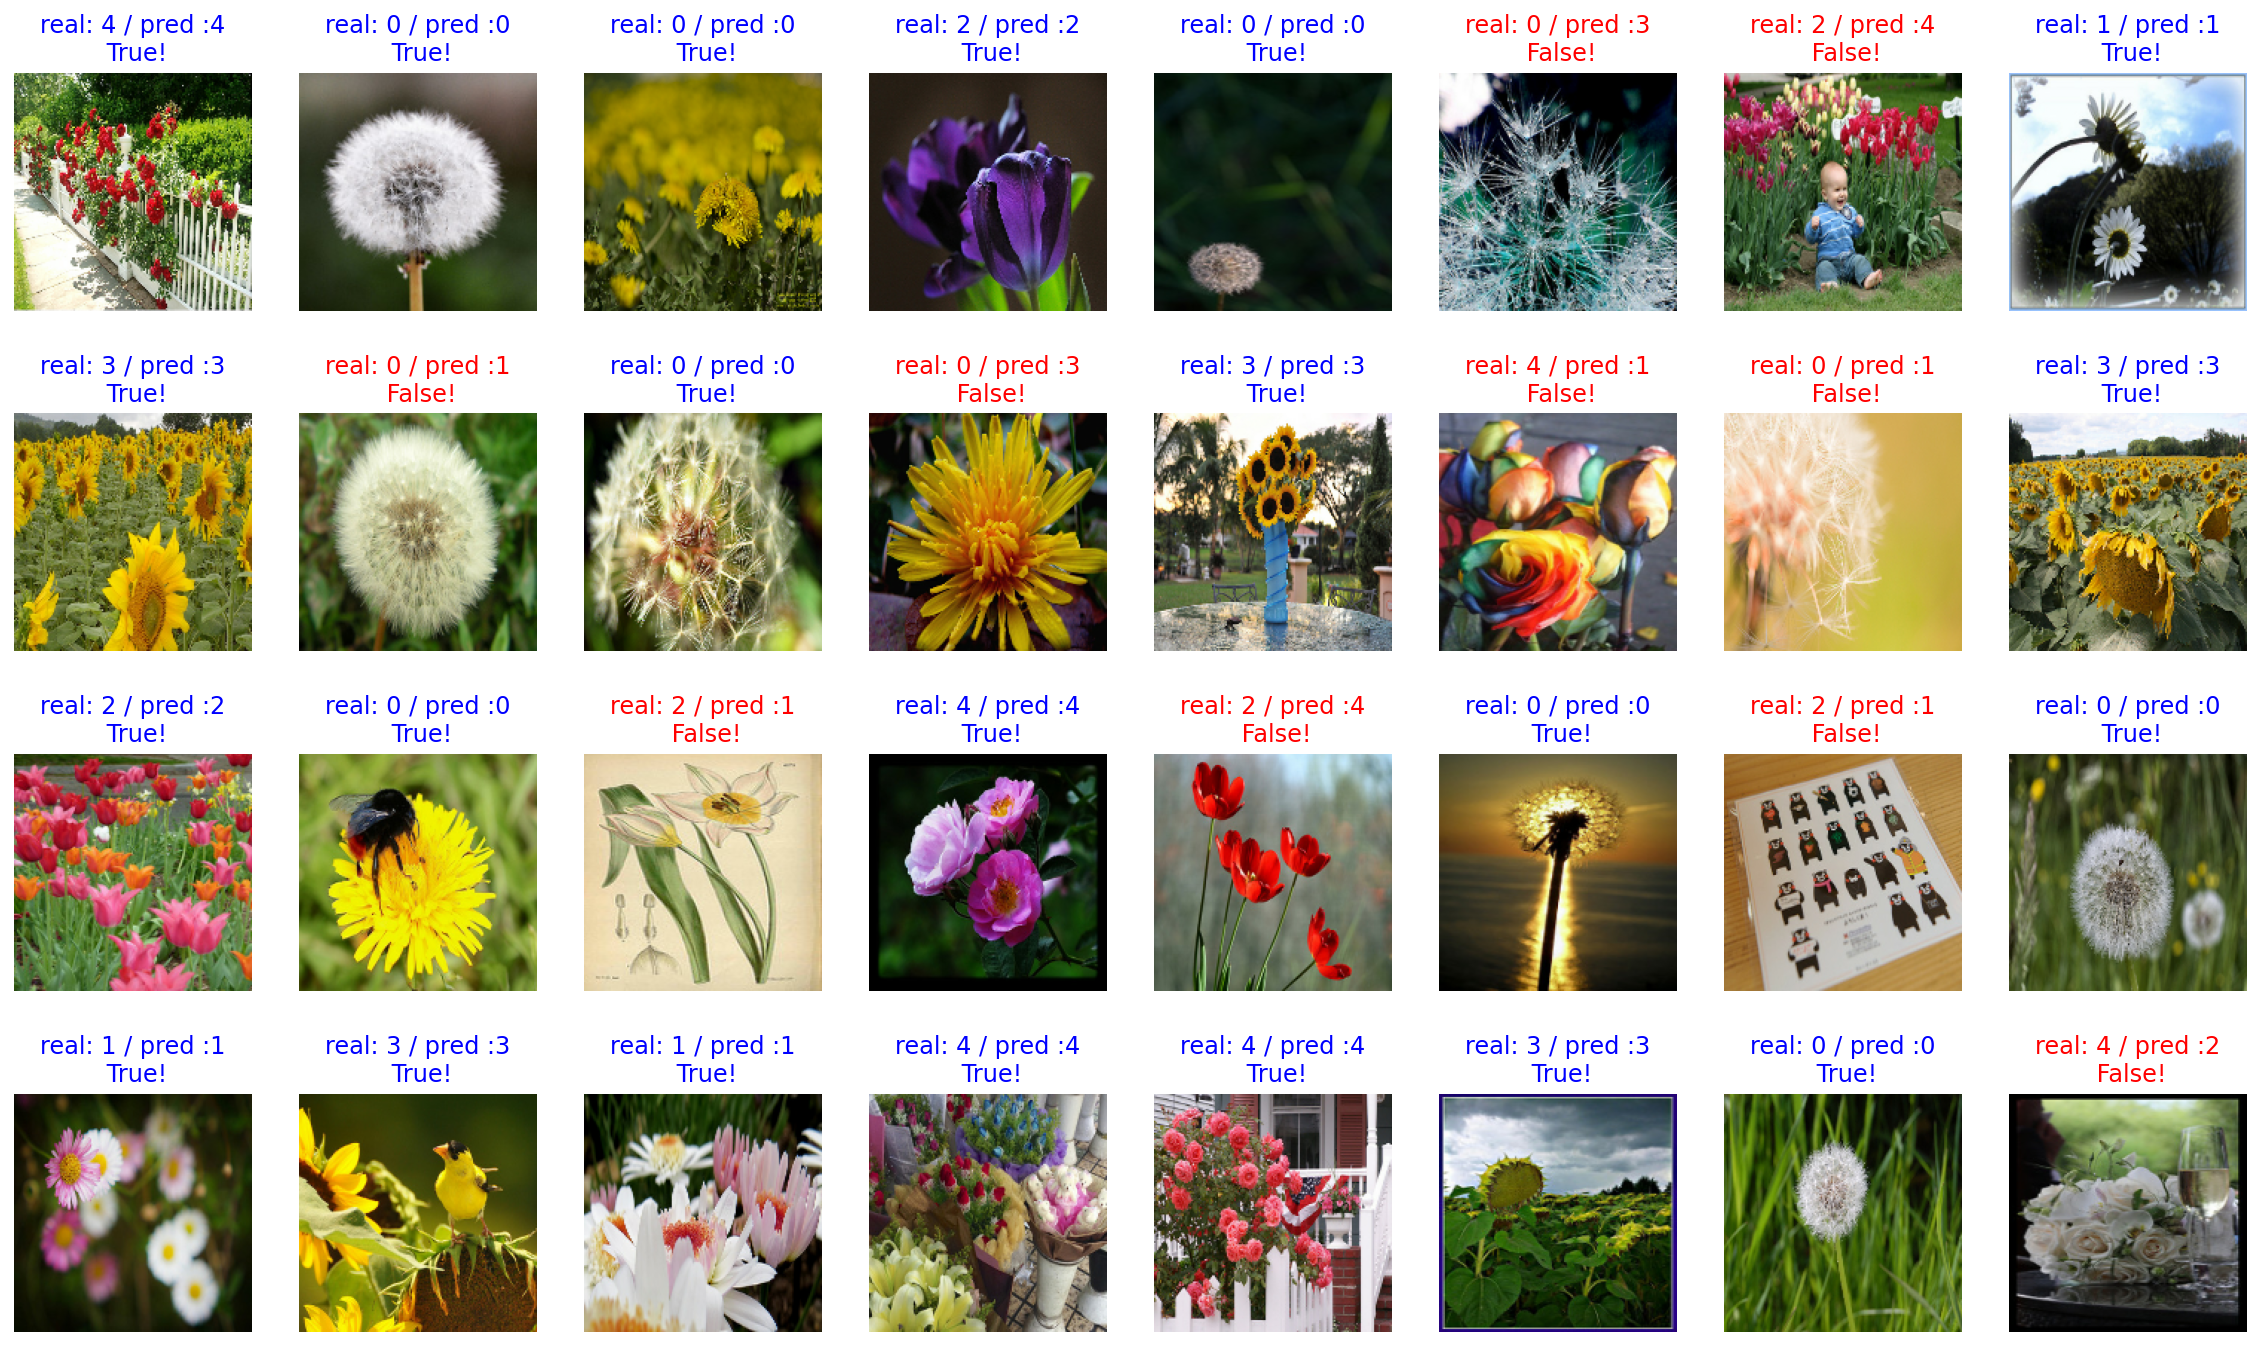

In [98]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [100]:
count = 0   # 정답을 맞춘 개수
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100)

68.75


# 이제 전이학습을 해보자 VGG16

In [101]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [102]:
image_batch.shape

TensorShape([32, 160, 160, 3])

In [103]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([32, 5, 5, 512])

In [104]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [105]:
feature_batch.shape

TensorShape([32, 5, 5, 512])

In [106]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


In [107]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [108]:
# dense layer에는 unit과 activation 2개의 매개변수만 사용해주세요.
# unit의 값은 위에서 global_average_layer를 통과했을 때의 값을 생각해보세요.
# 활성화 함수는 ReLU를 사용합니다.
dense_layer = Dense(512, activation='relu')
# unit은 우리가 분류하고 싶은 class를 생각해보세요.
# 활성화 함수는 Softmax를 사용합니다.
prediction_layer = Dense(5, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(32, 5)


In [110]:
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

In [111]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 2565      
Total params: 14,979,909
Trainable params: 265,221
Non-trainable params: 14,714,688
_________________________________________________________________


In [112]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [113]:
validation_steps=20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

12/20 [=================>............] - ETA: 1s - loss: 1.6087 - accuracy: 0.2943WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 20 batches). You may need to use the repeat() function when building your dataset.


20/20 [==============================] - 5s 122ms/step - loss: 1.6087 - accuracy: 0.2943
initial loss: 1.61
initial accuracy: 0.29


In [114]:
EPOCHS = 5   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
92/92 [==============================] - 11s 110ms/step - loss: 0.8918 - accuracy: 0.6686 - val_loss: 0.6831 - val_accuracy: 0.7302
Epoch 2/5
92/92 [==============================] - 9s 88ms/step - loss: 0.5911 - accuracy: 0.7922 - val_loss: 0.5195 - val_accuracy: 0.8147
Epoch 3/5
92/92 [==============================] - 9s 89ms/step - loss: 0.5011 - accuracy: 0.8243 - val_loss: 0.5689 - val_accuracy: 0.7902
Epoch 4/5
92/92 [==============================] - 8s 88ms/step - loss: 0.4499 - accuracy: 0.8471 - val_loss: 0.5130 - val_accuracy: 0.8065
Epoch 5/5
92/92 [==============================] - 8s 86ms/step - loss: 0.4068 - accuracy: 0.8590 - val_loss: 0.5190 - val_accuracy: 0.8038


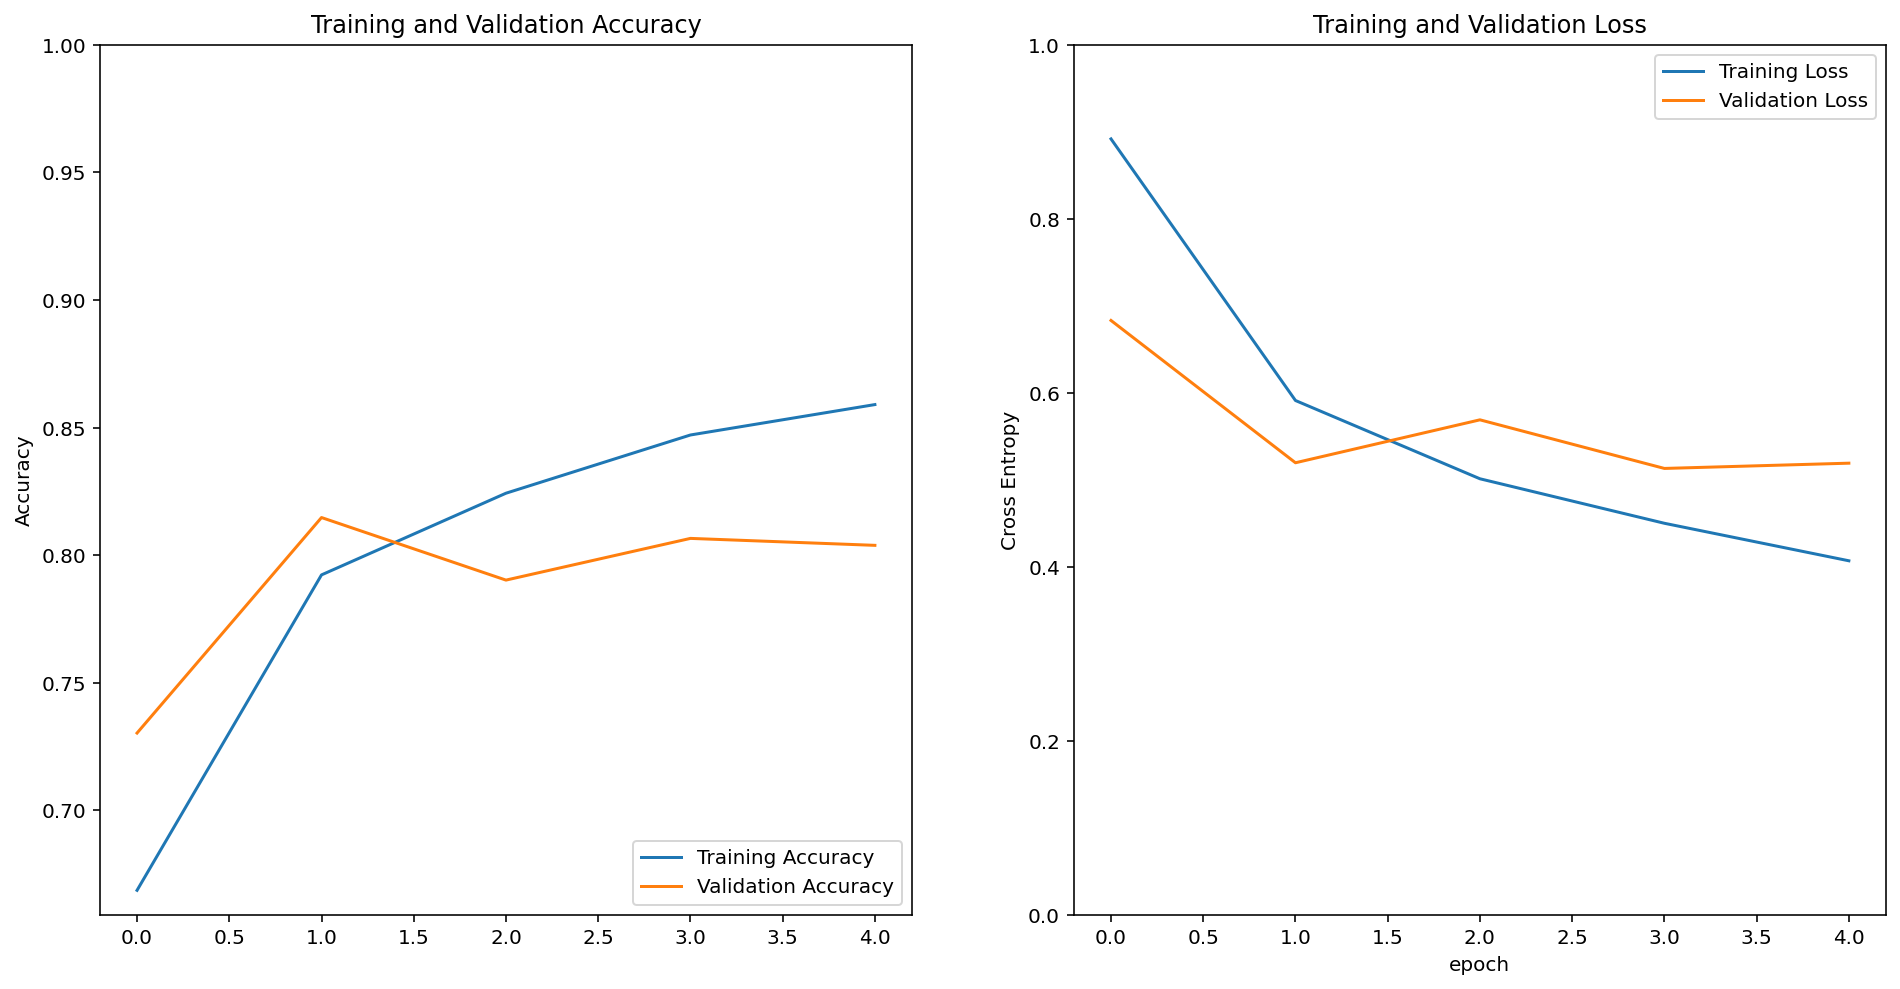

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 확실히 정확도가 높다. 그런데 에폭을 진행할수록 검증 정확도가 낮아진다. 과적합이다. 과적합을 해결하고, 손실율도 낮춰야 한다.
# 일단 수정하기 쉽게 하나의 노드에 모델을 다 넣어보자

In [131]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

feature_batch = base_model(image_batch)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

dense_layer = Dense(512, activation='relu')
prediction_layer = Dense(5, activation='softmax')

# feature_batch_average가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()



print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

EPOCHS = 5
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_60 (Dense)             (None, 5)                 2565      
Total params: 14,979,909
Trainable params: 265,221
Non-trainable params: 14,714,688
_________________________________________________________________
initial loss: 1.72
initial accuracy: 0.15
Epoch 1/5
92/92 [==============================] - 9s 85ms/step - loss: 0.8997 - accuracy: 0.6631 - val_loss: 0.6487 - val_accuracy: 0.7684
Epoch 2/5
92/92 [==============================] - 

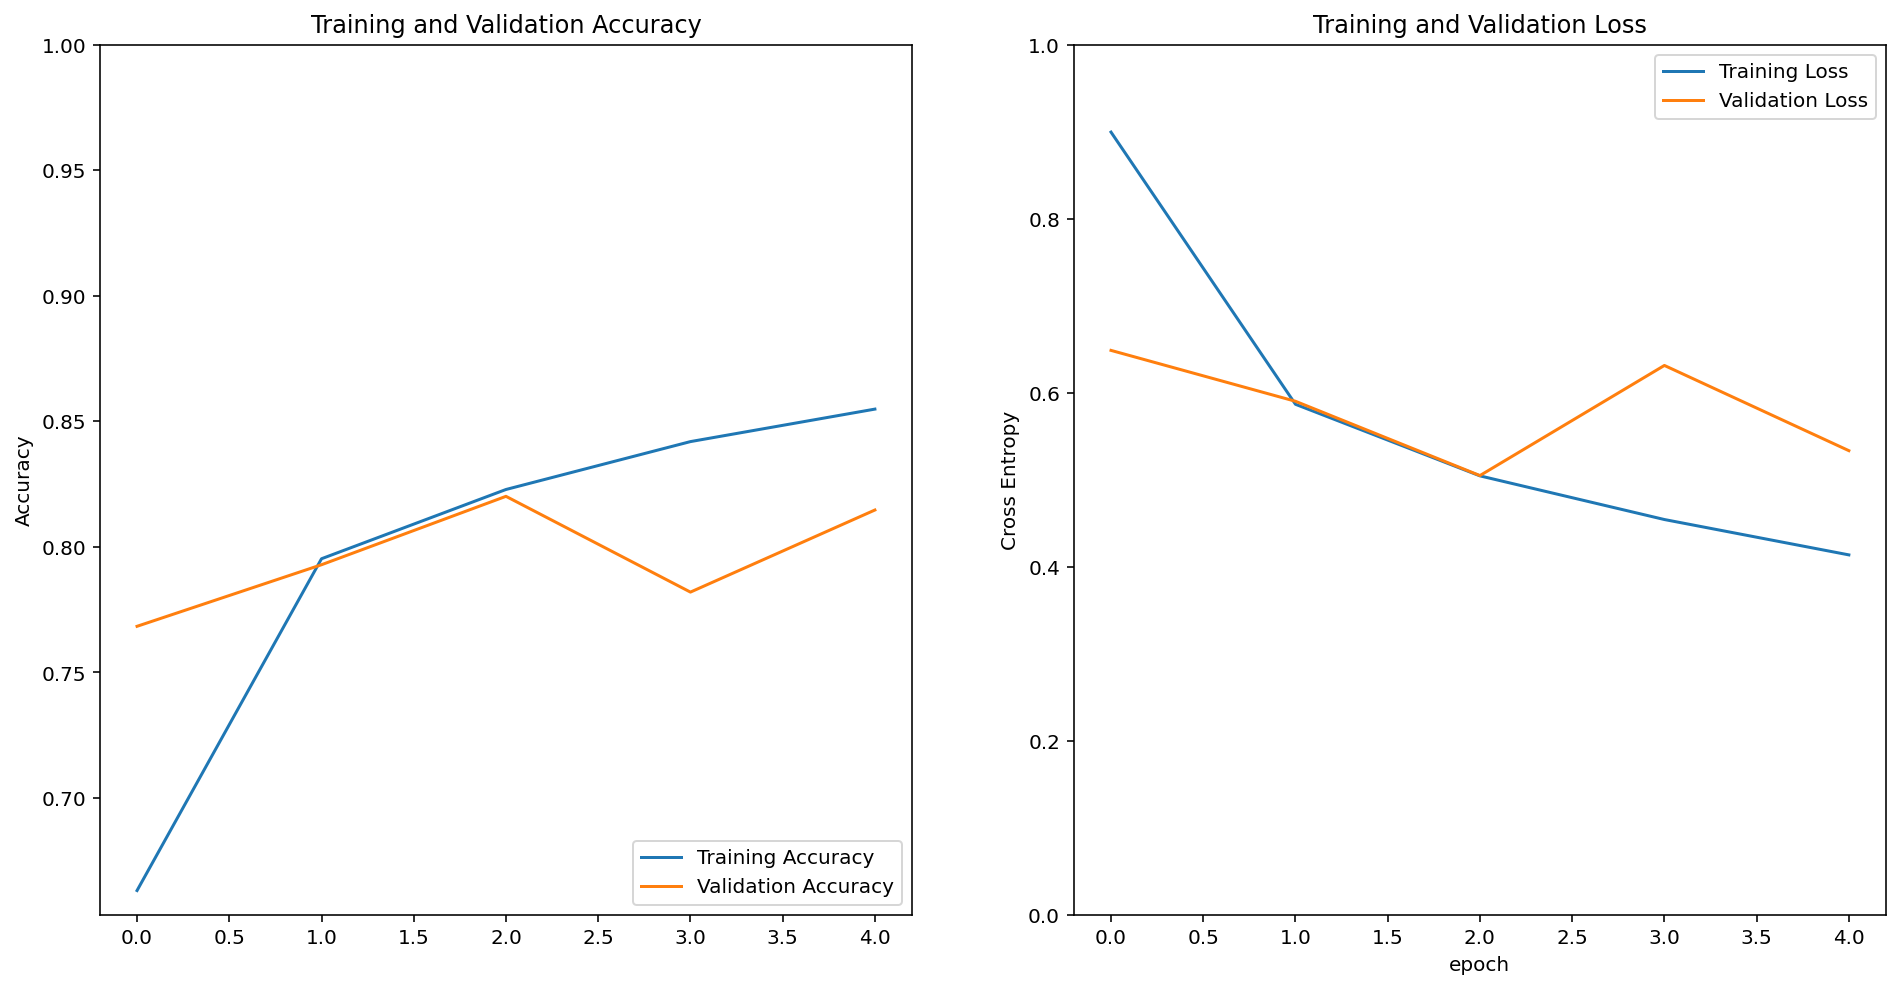

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 일단 에폭을 높여봐도 될것 같다

In [141]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

feature_batch = base_model(image_batch)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

dense_layer = Dense(512, activation='relu')
prediction_layer = Dense(5, activation='softmax')

# feature_batch_average가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()



print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_74 (Dense)             (None, 5)                 2565      
Total params: 14,979,909
Trainable params: 265,221
Non-trainable params: 14,714,688
_________________________________________________________________
initial loss: 1.72
initial accuracy: 0.15
Epoch 1/15
92/92 [==============================] - 9s 87ms/step - loss: 0.9363 - accuracy: 0.6410 - val_loss: 0.7153 - val_accuracy: 0.7275
Epoch 2/15
92/92 [==============================] 

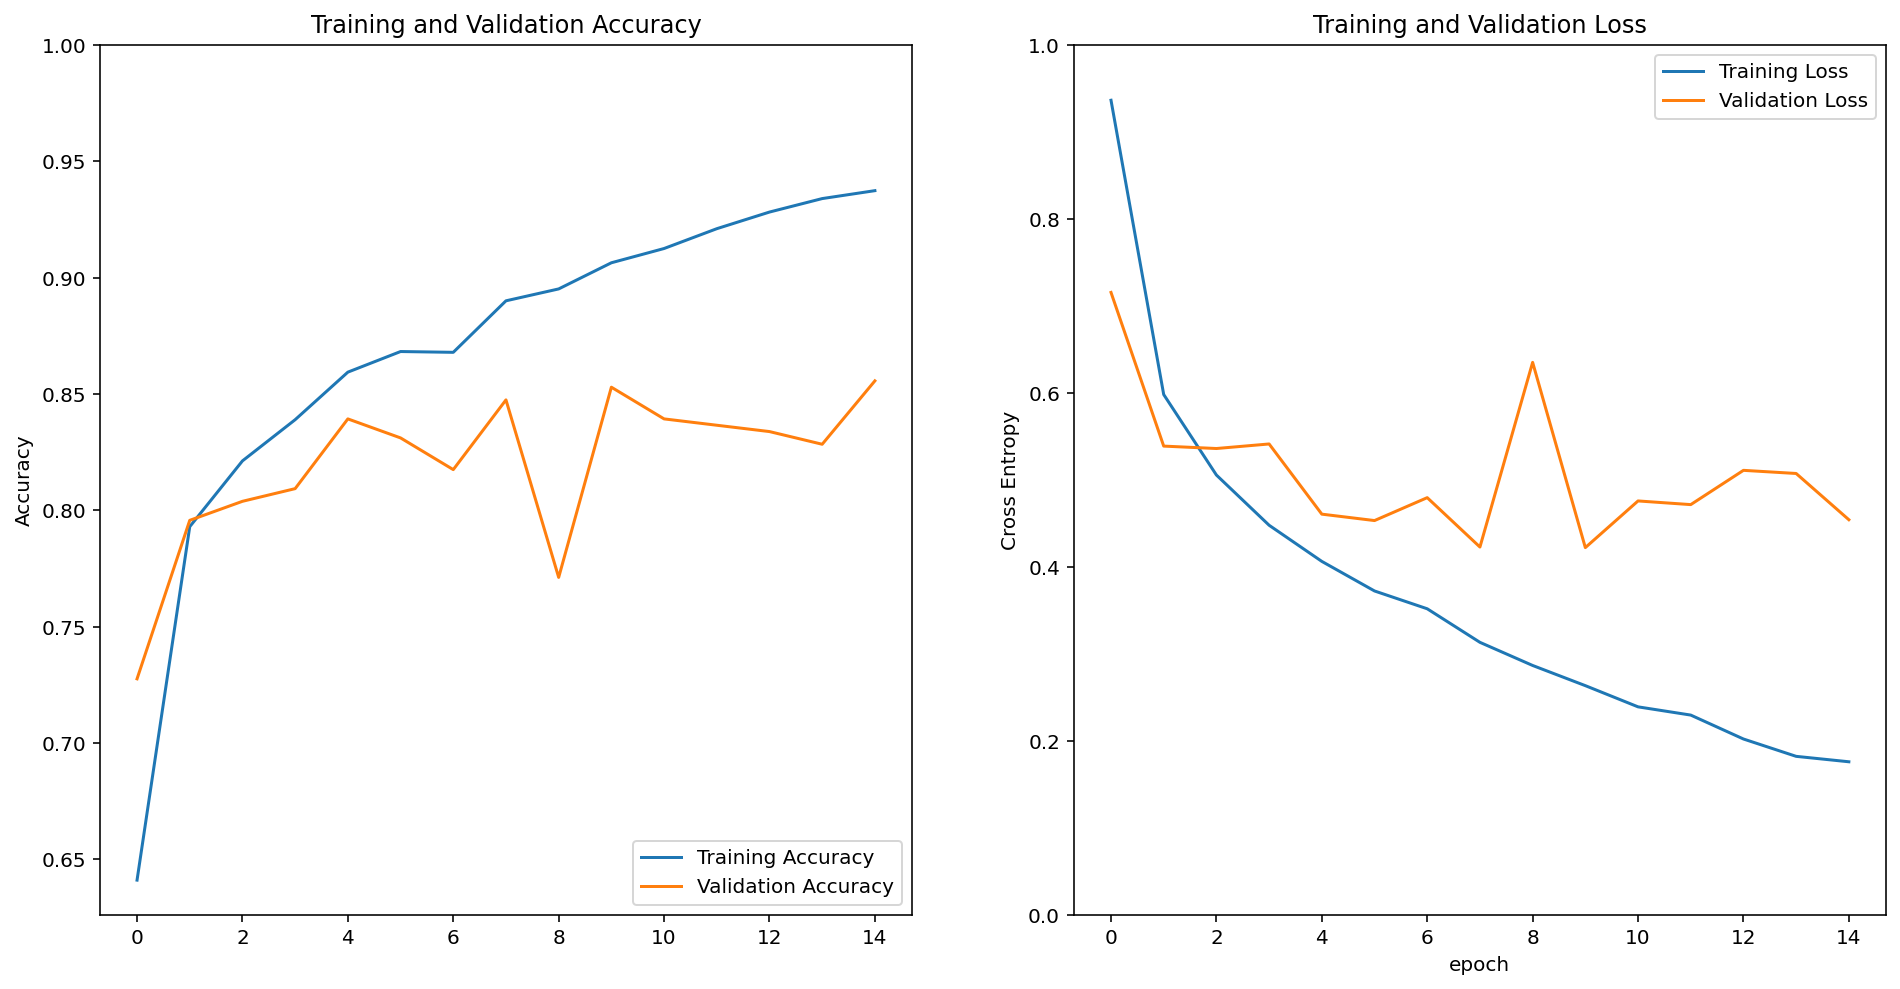

In [142]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Dense 레이어와 dropot  추가해보자

In [144]:

dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.5)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.5)

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)

# 두 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_dropout_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_dropout_2)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  dense_layer_2,
  dropout_layer_2,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 5)               

In [145]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 이상적인 그래프 모양이 나온다 하지만 정확도는 낮아졌다. 드롭아웃을 줄여보자

In [146]:

dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.3)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.3)

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)

# 두 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_dropout_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_dropout_2)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  dense_layer_2,
  dropout_layer_2,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 5)               

In [147]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 확도도 더 높아졌고 그래프 역시 안정적이고 깔끔하다. 과적합 이슈는 해결이 된것으로 보인다. 

In [148]:
dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.3)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.3)

dense_layer_3 = Dense(128, activation='relu')  # 추가: 세 번째 Dense 레이어
dropout_layer_3 = Dropout(0.3)

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)

# 두 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_dropout_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)

# 세 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_3 = dense_layer_3(dense_batch_dropout_2)
dense_batch_dropout_3 = dropout_layer_3(dense_batch_3)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_dropout_3)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  dense_layer_2,
  dropout_layer_2,
  dense_layer_3,
  dropout_layer_3,
  prediction_layer
])

base_learning_rate = 0.001 # 학습률 조정
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 9s 87ms/step - loss: 1.0859 - accuracy: 0.5613 - val_loss: 0.6830 - val_accuracy: 0.7330
Epoch 2/15
92/92 [==============================] - 8s 86ms/step - loss: 0.7195 - accuracy: 0.7466 - val_loss: 0.5929 - val_accuracy: 0.7629
Epoch 3/15
92/92 [==============================] - 9s 88ms/step - loss: 0.5898 - accuracy: 0.7861 - val_loss: 0.6170 - val_accuracy: 0.7956
Epoch 4/15
92/92 [==============================] - 9s 89ms/step - loss: 0.5223 - accuracy: 0.8127 - val_loss: 0.4931 - val_accuracy: 0.8065
Epoch 5/15
92/92 [==============================] - 9s 88ms/step - loss: 0.4888 - accuracy: 0.8246 - val_loss: 0.5670 - val_accuracy: 0.7902
Epoch 6/15
92/92 [==============================] - 8s 87ms/step - loss: 0.4409 - accuracy: 0.8501 - val_loss: 0.7156 - val_accuracy: 0.7820
Epoch 7/15
92/92 [==============================] - 8s 86ms/step - loss: 0.4291 - accuracy: 0.8491 - val_loss: 0.4845 - val_accuracy: 0.8338
Epoch 8/15
92

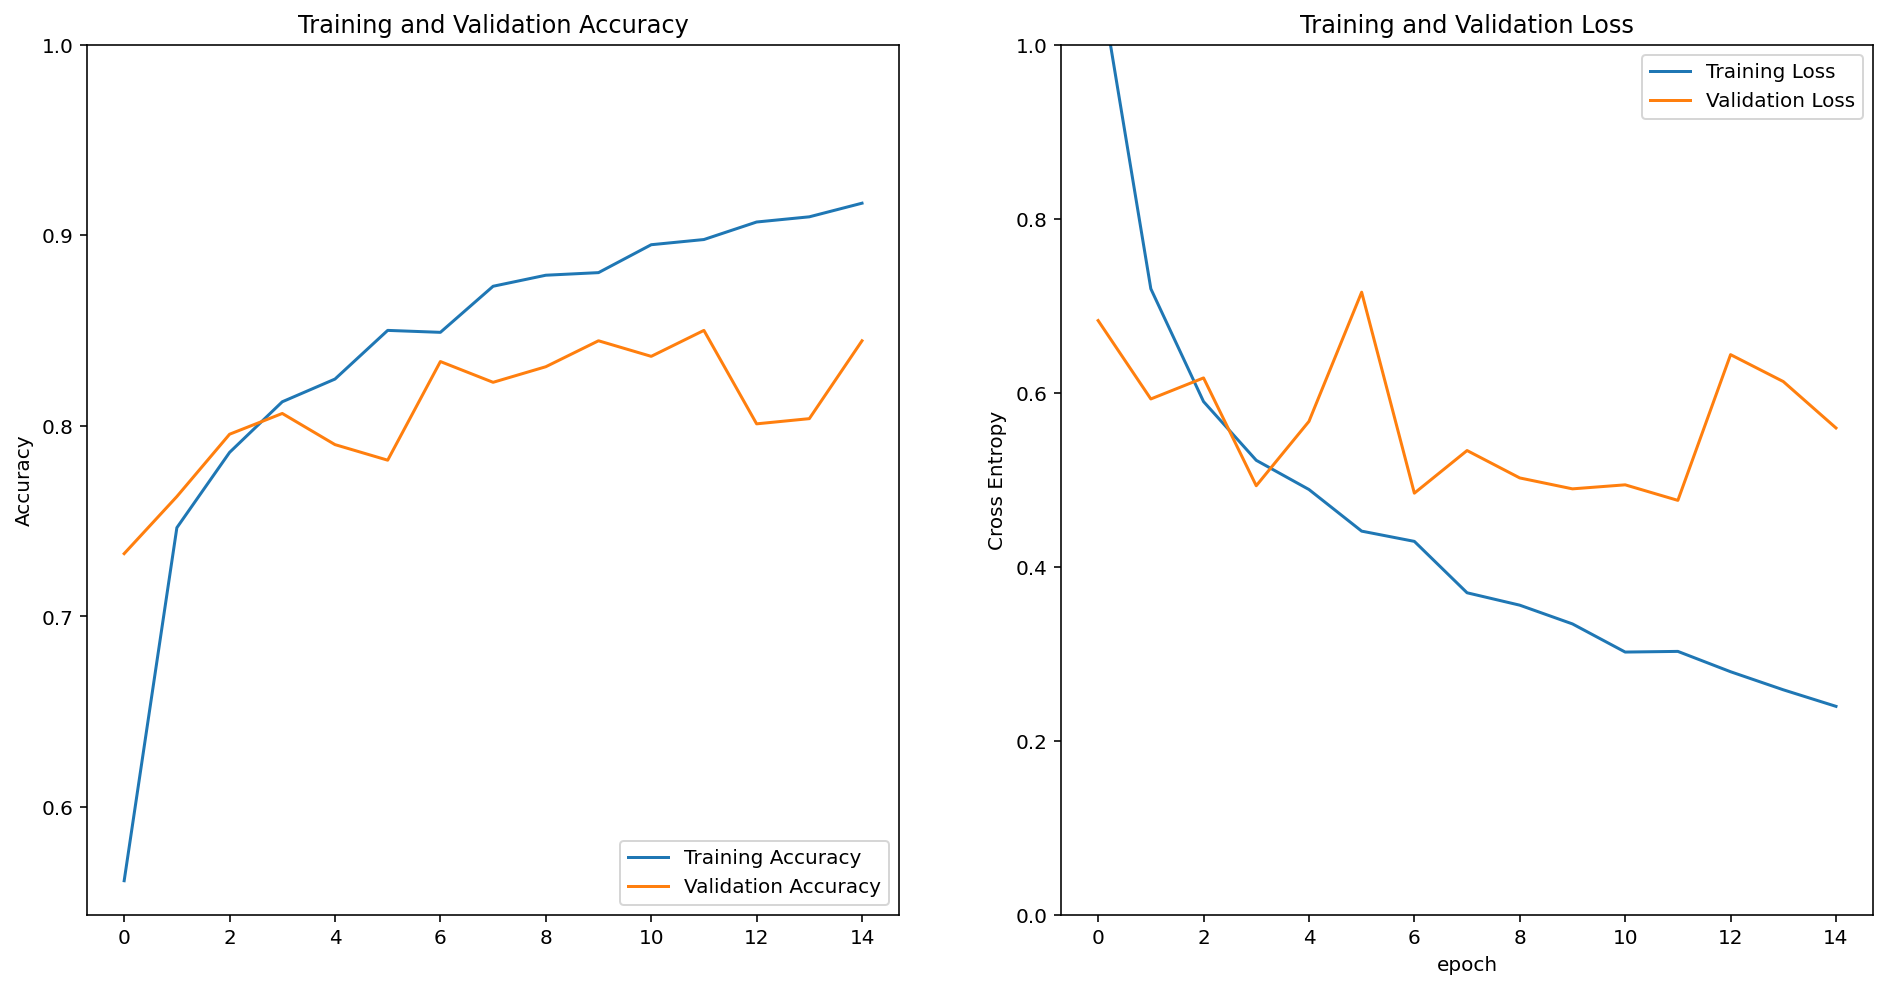

In [149]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 뭔가 잘못됐다. 학습률 때문인것 같다. 학습률만 다시 낮춘다


In [150]:
dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.3)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.3)

dense_layer_3 = Dense(128, activation='relu')
dropout_layer_3 = Dropout(0.3)

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)

# 두 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_dropout_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)

# 세 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_3 = dense_layer_3(dense_batch_dropout_2)
dense_batch_dropout_3 = dropout_layer_3(dense_batch_3)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_dropout_3)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  dense_layer_2,
  dropout_layer_2,
  dense_layer_3,
  dropout_layer_3,
  prediction_layer
])

base_learning_rate = 0.0001 # 학습률 조정
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/15
92/92 [==============================] - 9s 87ms/step - loss: 1.5647 - accuracy: 0.2960 - val_loss: 1.3743 - val_accuracy: 0.5368
Epoch 2/15
92/92 [==============================] - 8s 86ms/step - loss: 1.3635 - accuracy: 0.4608 - val_loss: 1.0933 - val_accuracy: 0.6213
Epoch 3/15
92/92 [==============================] - 8s 87ms/step - loss: 1.1592 - accuracy: 0.5443 - val_loss: 0.8952 - val_accuracy: 0.6894
Epoch 4/15
92/92 [==============================] - 9s 89ms/step - loss: 0.9879 - accuracy: 0.6315 - val_loss: 0.7618 - val_accuracy: 0.7248
Epoch 5/15
92/92 [==============================] - 9s 88ms/step - loss: 0.9081 - accuracy: 0.6553 - val_loss: 0.6953 - val_accuracy: 0.7466
Epoch 6/15
92/92 [==============================] - 8s 87ms/step - loss: 0.8187 - accuracy: 0.6952 - val_loss: 0.6491 - val_accuracy: 0.7575
Epoch 7/15
92/92 [==============================] - 8s 86ms/step - loss: 0.7574 - accuracy: 0.7146 - val_loss: 0.6063 - val_accuracy: 0.7766
Epoch 8/15
92

In [151]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 기존보다 깊이가 깊어졌음에도 정확도가 낮아졌다.
# 일전에 그래프 이상치는 학습률이 요인이 맞았다.
# 깊이는 다시 낮추고 옵티마이저를  ADAM으로 바꿔보자

In [155]:

dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.3)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.3)

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)

# 두 번째 Dense 레이어와 Dropout을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_dropout_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_dropout_2)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  dense_layer_2,
  dropout_layer_2,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

EPOCHS = 15
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 5)               

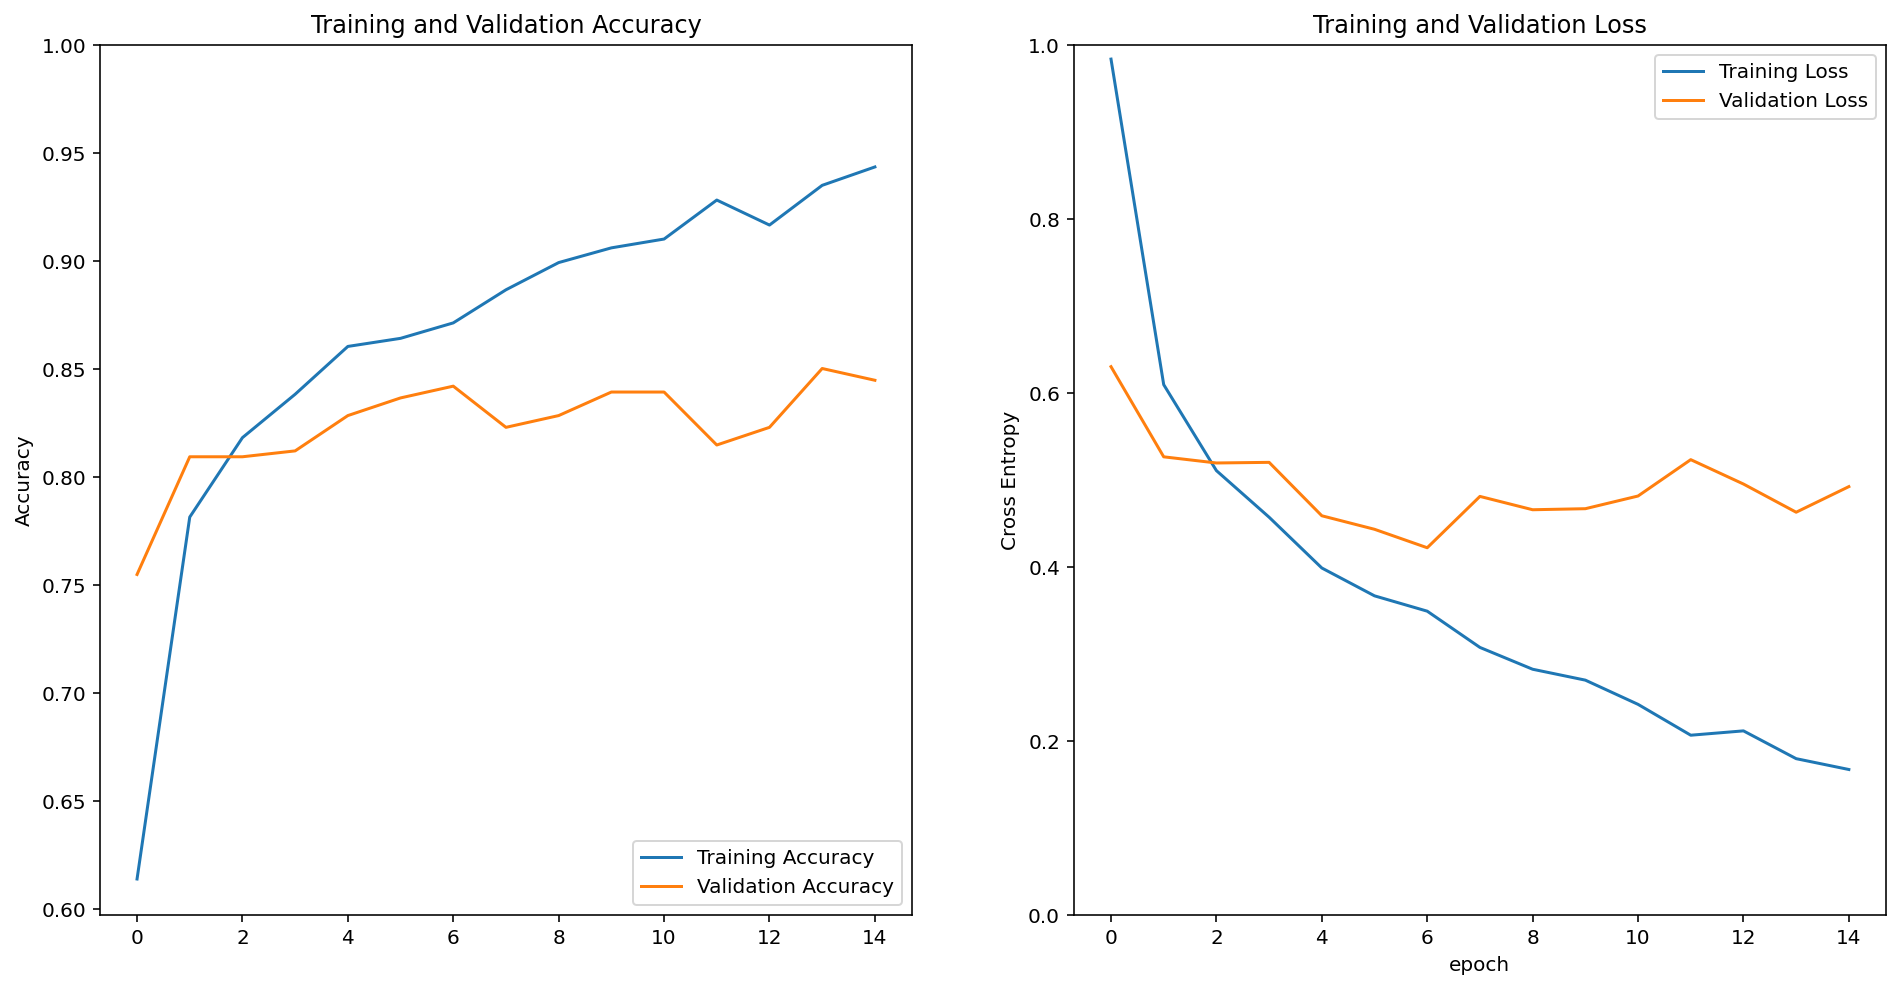

In [157]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 옵티마이저를 바꾸니 약간 과적합이 보이긴 하지만 검증데이터의 정확도는 소폭 상승했다.
# 배치 정규화를 추가하고 에폭도 증가시킨다

In [164]:
dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.3)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.3)

batch_norm_1 = BatchNormalization()
batch_norm_2 = BatchNormalization()

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)
dense_batch_norm_1 = batch_norm_1(dense_batch_dropout_1)

# 두 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_norm_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)
dense_batch_norm_2 = batch_norm_2(dense_batch_dropout_2)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_norm_2)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  batch_norm_1,
  dense_layer_2,
  dropout_layer_2,
  batch_norm_2,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

EPOCHS = 20  # 더 많은 Epochs로 시도해보세요
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 512)               2048      
_________________________________________________________________
dense_105 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_47 (Dropout)         (None, 256)             

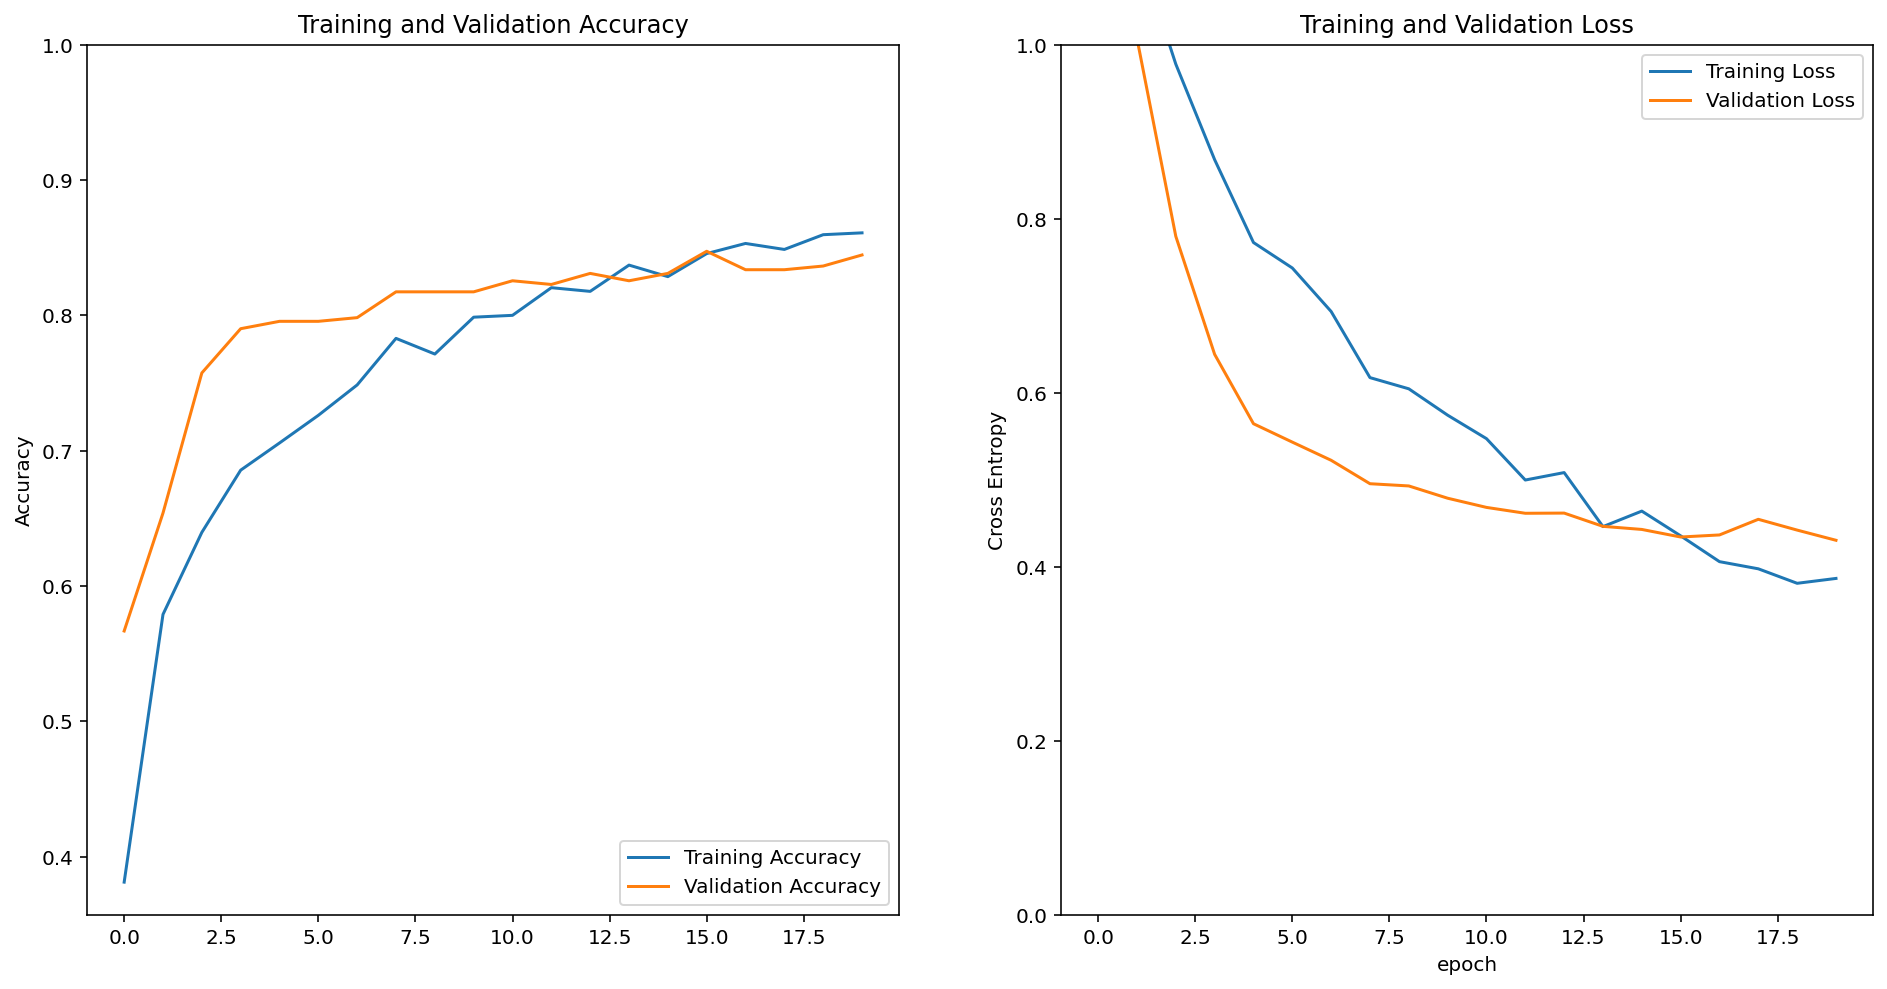

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 목표치인 85%를 어느정도 달성한것으로 보인다
# 마지막으로 학습율을 더 낮춰보면 어떤가 한다.
# 과적합도 별로 없어 보이니 에폭도 30까지 높여보자

In [170]:
dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.3)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.3)

batch_norm_1 = BatchNormalization()
batch_norm_2 = BatchNormalization()

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)
dense_batch_norm_1 = batch_norm_1(dense_batch_dropout_1)

# 두 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_norm_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)
dense_batch_norm_2 = batch_norm_2(dense_batch_dropout_2)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_norm_2)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  batch_norm_1,
  dense_layer_2,
  dropout_layer_2,
  batch_norm_2,
  prediction_layer
])

base_learning_rate = 0.00001 # 학습률 더 낮게
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

EPOCHS = 30  # 더 많은 Epochs로 시도해보세요
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_48 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 512)               2048      
_________________________________________________________________
dense_108 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_49 (Dropout)         (None, 256)             

In [171]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 학습율이 낮으니 과소적합이 되는듯 하다, 학습 효율성이 좀 떨어지는것 같다. 0.00005를 해보자

In [172]:
dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.3)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.3)

batch_norm_1 = BatchNormalization()
batch_norm_2 = BatchNormalization()

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)
dense_batch_norm_1 = batch_norm_1(dense_batch_dropout_1)

# 두 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_norm_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)
dense_batch_norm_2 = batch_norm_2(dense_batch_dropout_2)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_norm_2)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  batch_norm_1,
  dense_layer_2,
  dropout_layer_2,
  batch_norm_2,
  prediction_layer
])

base_learning_rate = 0.00005 # 학습률 더 낮게
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

EPOCHS = 30  # 더 많은 Epochs로 시도해보세요
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_50 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_104 (Bat (None, 512)               2048      
_________________________________________________________________
dense_111 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_51 (Dropout)         (None, 256)             

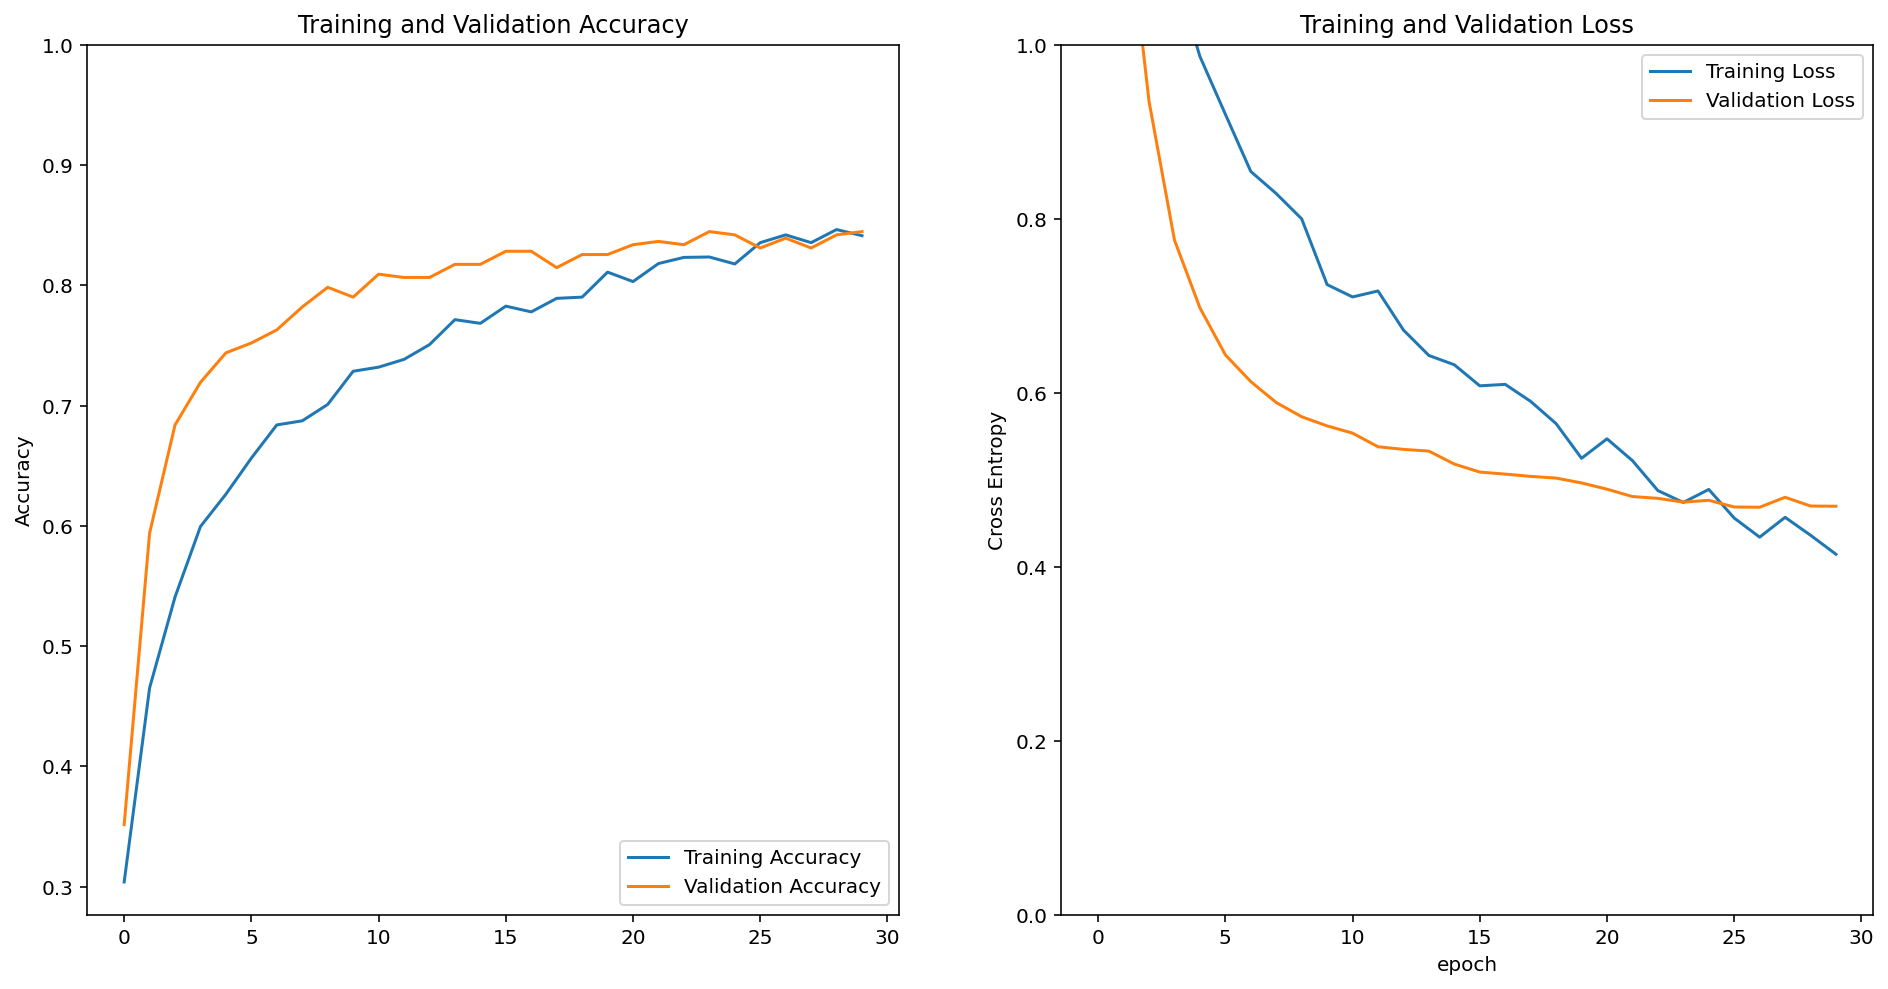

In [173]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 뚜렷한 개선이 보이지 않는다. 드롭아웃을 줄여보자 학습률도 조금만 더 높이자

In [193]:
dense_layer_1 = Dense(512, activation='relu')
dropout_layer_1 = Dropout(0.2)

dense_layer_2 = Dense(256, activation='relu')
dropout_layer_2 = Dropout(0.2)

batch_norm_1 = BatchNormalization()
batch_norm_2 = BatchNormalization()

prediction_layer = Dense(5, activation='softmax')

# 첫 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_1 = dense_layer_1(feature_batch_average)
dense_batch_dropout_1 = dropout_layer_1(dense_batch_1)
dense_batch_norm_1 = batch_norm_1(dense_batch_dropout_1)

# 두 번째 Dense 레이어와 Dropout, Batch Normalization을 적용합니다.
dense_batch_2 = dense_layer_2(dense_batch_norm_1)
dense_batch_dropout_2 = dropout_layer_2(dense_batch_2)
dense_batch_norm_2 = batch_norm_2(dense_batch_dropout_2)

# Prediction 레이어를 통과시켜 최종 결과를 얻습니다.
prediction_batch = prediction_layer(dense_batch_norm_2)

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer_1,
  dropout_layer_1,
  batch_norm_1,
  dense_layer_2,
  dropout_layer_2,
  batch_norm_2,
  prediction_layer
])

base_learning_rate = 0.000075 # 학습률 더 낮게
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

EPOCHS = 30  # 더 많은 Epochs로 시도해보세요
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_54 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_108 (Bat (None, 512)               2048      
_________________________________________________________________
dense_117 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_55 (Dropout)         (None, 256)             

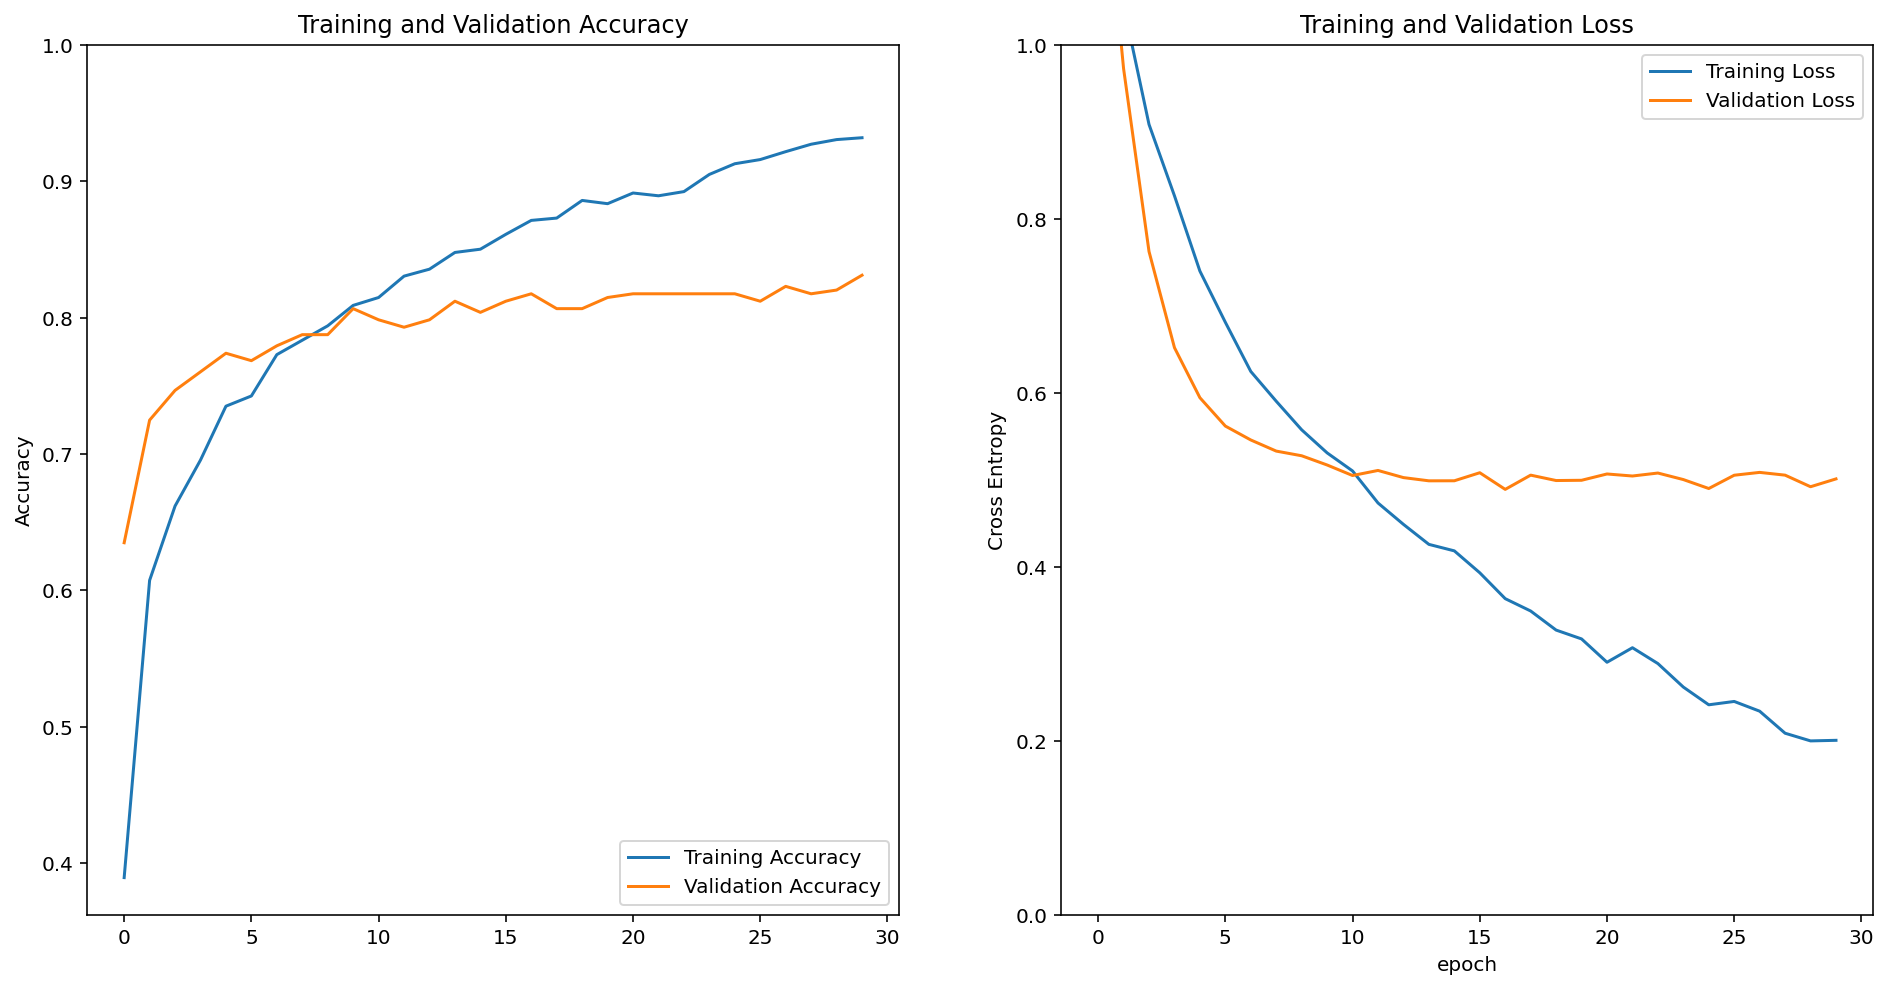

In [195]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [194]:
test_loss, test_accuracy = model.evaluate(test_batches)

12/12 [==============================] - 1s 67ms/step - loss: 0.4655 - accuracy: 0.8692


# 간신히 목표 정확도를 맞추긴 했다..

# 회고
## K : 모델 성능 개선을 위해 끊임 없이 다양한 방법을 적용해본점, 현재 문제점을 파악하고 해결하려 한점.
## P : 내가 할수 있는 방법을 다써봐도 안될때 더 개선할수 있는 방법이 잘 떠오르지 않는다..
##  T : 외부자료를 보는것에 익숙해지고, 적용까지 해보기